## Chapter 3. Exploratory Data Analysis and Data Visualization
## 第三章. 探索性數據分析與數據可視化技術
### 前言：從「為什麼會這樣發生」到「將會發生什麼」
- 在前章的第四節，我們說明了一些使用pandas做數據的基礎準備與清理(data preparation and munging)，當我們完成該項工作後，下一步就是探索與分析數據了。探索性數據分析(exploratory data analysis;EDA)是種分析數據的方法之一，它主要的目的是總結出數據的主要特徵，根據對這些特徵的了解，可以進一步對資料做整理。在正式建模任務之前，EDA主要是用於查看數據可以告訴我們什麼？在探索性數據分析中，描述性統計(descriptive statistics)的方法可以理清出數據樣本的主要統計量(statistics)，以便於了解數據樣本的趨勢並做個總結(summarize)。趨勢包括如下：
    - 攸關集中趨勢(central tendency)的平均值(mean)、中位數(median)、眾數(mode)以及數據變數的峰度(kurtosis)和偏度(skewnes);
    - 攸關分散(dispersion)狀況的標準差(standard deviation)、四分位間距(quartile range)、範圍(range;最小值和最大值);
    - 攸關數據分佈(distribution)的直方圖或密度估計)(histogram or density estimate)，分位數圖(quantile plot)，累積分佈函數(cumulative distribution function)，相對頻率表(relative frequencies);
    - 攸關關聯性的數據變數間之相關性(correlation)、勝算比(odds-ratio)以及標準化平均差(standardized mean difference)等等。

- EDA通常可藉由數據可視化(data visualization; DV)的技術，來協助我們觀察數據，傳達自己的發現。數據可視化是個圖形化技術，利用各種各樣的圖表，線性圖、圓餅圖等等，將描述性分析以視覺化來呈現數據的趨勢。數據可視化技術的應用很廣，它不單單只能用於較偏於統計分析的EDA，它也可以藉由人的想像力和創造力來洞察非結構化(unstructured)數據的內含。數據可視化技術也廣泛被運用於企業的報表顯現，特別是對於業務活動監控和企業的績效管理。
- EDA及DV的分析，可以讓我們建立數據因子之間因果關係的假設，並藉由統計推斷(statistical inference)來評估該項假設，繼而達到一個以信賴度(confidence level)來解釋的結論，進而提供未來數據蒐集的方向與活動。
- EDA是統計思維的一種技術方式，雖然EDA透過描述性分析以統計量測呈現過去的狀況，而不聚焦於對未來的預測，然而這樣的分析，其重要的價值之一是可以用於預警(alerts)的應用上。亦即，當數值高於或低於某些統計量測值時，會發出預警通知。例如，當地震發生時，震動波高於平均數值的半個標準差時，發出通知就是一種例子。

在本章中，我們將先回顧一些統計學的概念，討論什麼是統計推論(statistical inference)，然後藉由範例來介紹EDA與DV的分析方法。
### 免費參考書籍
Allen B. Downey有兩本關於統計與Python的書籍。這兩本書是免費的，只要不用於商業目的，可以自由複制，分發與修改。
- 第一本書的下載網址為[Think Stats - Probability and Statistics for Programmers](http://greenteapress.com/wp/think-stats-2e/)。這是本初級概率與統計課程的教科書。它強調使用統計數據來探索大型數據集，以Python程式來解說與驗證，以增進讀者對概率與統計的了解。
- 第二書的下載網址為[Think Stats - Exploratory Data Analysis in Python](http://greenteapress.com/wp/think-stats-2e/)。這本書介紹主要是以Python作為探索性數據分析的工具，內容有數據的載入和清理(importing and cleaaning)，也就是在前章第四節談到的讀取數據，清理和轉換數據等。在探索性數據分析上，涵蓋單變量(single variable)分析、成對(pair-wise)變量之間的可能關係、多變量分析(multivariate analysis)、估計和假設檢驗(estimation and hypothesis testing)以及數據視覺化。

[回本章目錄](#本章目錄)

In [25]:
# -*- coding: UTF-8 -*-
%autosave 120
%load_ext version_information
%version_information pandas, numpy, matplotlib, scipy, seaborn

Autosaving every 120 seconds
The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.5.5 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 5.0.0
OS Darwin 18.0.0 x86_64 i386 64bit
pandas 0.23.4
numpy 1.14.3
matplotlib 2.2.2
scipy 1.1.0
seaborn 0.9.0
Mon Oct 15 15:36:02 2018 CST

作者為本章撰寫了以下的三個自定義函數，主要是執行肩並肩的列印、釋放記憶體空間以及建立工作區目錄。請讀者自行了解其Python代碼的寫法

In [26]:
# 定義函數以便執行肩並肩的列印
def side_by_side(*objs, **kwds):
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print (adjoin(space, *reprs))
    print()
    return

In [27]:
# 釋放記憶體空間 - Free Memory
# (1) 獲取物件及其大小的排序列表 
# (2) 將刪除的物件所佔的記憶體釋放
def memoryClean(dirList):
    print('Total Process Memory Usages: %s' %psutil.Process().memory_info().rss)
    print('Memory Usage Statistics: %s' %str(psutil.virtual_memory()))
    reserved_vars = ['In', 'Out', 'exit', 'quit', 'ipython_vars', 
                     'side_by_side', 'memoryClean']
    # Display Memory Usage
    # sorted([(x, sys.getsizeof(globals().get(x))) for x in dir()
            # if not x.startswith('_') and
            # x not in sys.modules and
            # x not in ipython_vars],key=lambda x: x[1], reverse=True)
    for name in dirList:
        if not name.startswith('_') and name not in sys.modules and name not in reserved_vars:
            del globals()[name]
    import gc
    gc.collect()

In [28]:
# 建立目錄
IODataDir = "./Data_and_Images/"
import os
if not os.path.exists(IODataDir):
    os.makedirs(IODataDir)

## 本章目錄

* [1. 統計推論(Statistical Inference)與探索性數據分析(EDA)](#1.-統計推論&#40;Statistical-Inference&#41;與探索性數據分析&#40;EDA&#41;)
    * [1.1 統計推論](#1.1-統計推論)
    * [1.2 海量數據與統計推論](#1.2-海量數據與統計推論)
    * [1.3 探索性數據分析](#1.3-探索性數據分析)
    * [1.4 敘述性統計與統計推論](#1.4-敘述性統計與統計推論)
    * [1.5 RFMsDF的數據載入](#1.5-RFMsDF的數據載入)
* [2. 統計學基本介紹(An Introduction to Statistics)](#2.-統計學基本介紹&#40;An-Introduction-to-Statistics&#41;)
    * [2.1 載入NSFG的數據](#2.1-載入NSFG的數據)
    * [2.2 數據的清理(data munging) - 驗證數據、識別錯誤、轉換數據類型](#2.2-數據的清理&#40;data-munging&#41;---驗證數據、識別錯誤、轉換數據類型)
    * [2.3 數據類型(datatypes)的理解](#2.3-數據類型&#40;datatypes&#41;的理解)
    * [2.4 數據集的統計圖示](#2.4-數據集的統計圖示)
        * [2.4.1 單變量數據的統計圖示](#2.4.1-單變量數據的統計圖示)
        * [2.4.2 多變量數據的統計圖示](#2.4.2-多變量數據的統計圖示)
        * [2.4.3 Seaborn的箱鬚圖視覺化圖示範例](#2.4.3-Seaborn的箱鬚圖視覺化圖示範例)
        * [2.4.4 Seaborn的散點圖矩陣視覺化圖示範例](#2.4.4-Seaborn的散點圖矩陣視覺化圖示範例)
        * [2.4.5 平行座標圖(parallel coordinates)視覺化圖示範例](#2.4.5-平行座標圖&#40;parallel-coordinates&#41;視覺化圖示範例)
        * [2.4.6 相關性Heapmap視覺化圖示範例](#2.4.6-相關性Heapmap視覺化圖示範例)
* [3. 探索性數據分析範例I-自行車共享數據集](#3.-探索性數據分析範例I-自行車共享數據集)
   * [3.1 載入資料](#3.1-載入資料)
   * [3.2 數據類型和摘要統計](#3.2-數據類型和摘要統計)
       * [3.2.1 淺談資料的縮放(scaling)以及資料正規化(normalization)](#3.2.1-淺談資料的縮放&#40;scaling&#41;以及資料正規化&#40;normalization&#41;)
       * [3.2.2. 資料分佈的偏度(skewness)和峰度(kurtosis)](#3.2.2.-資料分佈的偏度&#40;skewness&#41;和峰度&#40;kurtosis&#41;)
       * [3.2.3 攸關分散(dispersion)狀況的平均絕對差(Mean Absolute Deviation; MAD)量測](#3.2.3-攸關分散&#40;dispersion&#41;狀況的平均絕對差&#40;Mean-Absolute-Deviation;-MAD&#41;量測)
   * [3.3 分類變量在租用數上的趨勢/關係的視覺化](#3.3-分類變量在租用數上的趨勢/關係的視覺化)
       * [3.3.1 季節性的每小時租用數趨勢(Season Wise Hourly Trend of Count)](#3.3.1-季節性的每小時租用數趨勢&#40;Season-Wise-Hourly-Trend-of-Count&#41;)
       * [3.3.2 工作日的每小時租用數分佈(Weekday Wise Hourly Distribution of Total Counts)](#3.3.2-工作日的每小時租用數分佈&#40;Weekday-Wise-Hourly-Distribution-of-Total-Counts&#41;)
       * [3.3.3 每月的租用數分佈(Monthly Distribution of Total Counts)](#3.3.3-每月的租用數分佈&#40;Monthly-Distribution-of-Total-Counts&#41;)
       * [3.3.4 租用數的季節性分佈(Seasonal Distribution of Total Counts)](#3.3.4-租用數的季節性分佈&#40;Seasonal-Distribution-of-Total-Counts&#41;)
       * [3.3.5 租用數的年度分佈(Year Wise Count Distributions)](#3.3.5-租用數的年度分佈&#40;Year-Wise-Count-Distributions&#41;)
       * [3.3.6 工作日相對於假期的租用數分配(Working Day versus Holiday Distribution)](#3.3.6-工作日相對於假期的租用數分配&#40;Working-Day-versus-Holiday-Distribution&#41;)
   * [3.4 數值變量在租用數上的趨勢/關係的視覺化](#3.4-數值變量在租用數上的趨勢/關係的視覺化)
       * [3.4.1 攝氏溫度與體溫在租用數上的趨勢(Temp/aTemp vs. Counts)](#3.4.1-攝氏溫度與體溫在租用數上的趨勢&#40;Temp/aTemp-vs.-Counts&#41;)
       * [3.4.2 濕度/風速在租用數上的趨勢(Humidity/Windspeed vs. Counts)](#3.4.2-濕度/風速在租用數上的趨勢&#40;Humidity/Windspeed-vs.-Counts&#41;)
   * [3.5 離群值(Outliers)的判讀](#3.5-離群值&#40;Outliers&#41;的判讀)
   * [3.6 屬性間的相關性(Correlations)](#3.6-屬性間的相關性&#40;Correlations&#41;)
* [4. 探索性數據分析範例II-IMDB用戶的電影評分數據集](#4.-探索性數據分析範例II-IMDB用戶的電影評分數據集)

[回本章目錄](#本章目錄)

## 1. 統計推論(Statistical Inference)與探索性數據分析(EDA)
### 1.1 統計推論
- 學過統計學的人，可能會對統計推論感到很無味。其實，統計推論是一項具深度和美感的學科。在第一章中，我們談到洪水般的數據湧現，意味著，我們的世界其實是個很能製造數據的大機器。我們面對這些大數據時，當然希望能夠描述數據，理解數據，甚至理解這些數據產生的過程(process)。做為一位數據科學家，我們不單只是想更好地理解這個世界，我們更期望在理解這些數據的過程中，能試圖解決問題。然而，我們面對的是一個充滿著複雜性(complexity)的環境，因此，數據的來源與蒐集數據的程序(procedure)隱含著隨機(randomness)和不確定(uncertainty)：
    - 數據的來源本身濳在著隨機性和不確定性。
    - 蒐集數據的程序是個完全主觀(subjective)而不是客觀(objective)的程序，而攸關該數據的蒐集方法也是主觀性的。也就是說，蒐集數據的程序本身是具有濳在的隨機性和不確定性
- 有了上述的概念後，我們來介紹兩個專有名詞：樣本(sample)與母體(population)，數據蒐集的程序謂之採樣(sampling)，蒐集到的數據謂之樣本。對所採得的樣本，在統計學意義上，可以代表母體(所有的數據)嗎？這就是統計推論的基本概念。現在，讓我們來定義何謂統計推論：統計推論是指統計學中，研究如何根據樣本數據去推論總體數量(母體)特徵的方法。換言之，對樣本數據進行描述後，再對母體的未知特徵做出以機率形式表述的推論就是統計推論。也可以說，統計推論是在一段有限的時間內，通過對一個隨機過程的觀察來進行推論的。
- 讓我們以第二章的電子商務交易數據為例。我們假設數據的母體(population)是該電子商務公司自開張經營到今日的所有交易數據。當我們抽取一個樣本(sample)時，我們採用一個所有交易數據的子集合(例如，交易數據的時間為2016年10月、11月及12月共三個月)來檢查觀察結果，這個動作我們稱之採樣(sampling)。我們企圖從樣本中，得出結論並對母體進行推論。數據採樣有多種不同的採樣機制，例如，我們可以從母體中並隨機選擇1/10的交易數據。 或者，我們也可以可以隨機抽取每天交易數據的1/10作為樣本。這兩種方法都是合理的，並且都產生相同的樣本大小。但是，如果我們拿兩個樣本來計算每個人的平均交易總數，並用它們來估算所有每個顧客在該電子商務公司交易總數的基本分佈，我們可能會得到完全不同的答案。不當的採樣機制，可能會在數據中引入了偏差並使其失真。一旦發生這種情況，我們所得出的任何推論都只會是錯誤和扭曲的。

[回本章目錄](#本章目錄)

### 1.2 海量數據與統計推論
- 當今科技已能處理海量數據的儲存與支援海量數據的計算(例如，Hadoop)。因此，或許有人會有問，我們既然已經有了足夠的母體數據，那為什麼還要採樣？。回答這個問題，關鍵在數據科學的研究項目其所牽涉到的整體數據範圍。例如，研究一個社交網站(如twitter)的整體使用者之使用行為，可以推論到該社交網站外的其他人之使用行為嗎？事實上，即使現今科技已能讓我們儲存與計算母體數據，我們根據這些數據所作的任何推斷，不見得能延伸到對母體以外的數據，即使在母體範圍內，也不見得能延伸到對某些特定日期的交易用戶作出結論。以電子商務交易的數據庫而言，交易行為的產生與產品類別、當時的商品流行、顧客當年的年紀、該年紀在當年的喜好趨勢等等有關，三年前的顧客對產品的偏愛與三年後同年紀顧客之產品偏愛，不見得是相似的。這個現象，我們也稱之概念漂移(concept drift)。在海量數據下，對一項數據科學的研究項目而言，了解樣本與母體的範圍，反而比以往任何時候更重要了。這也是為什麼數據科學的研究團隊中，具專業領域(domain knowledge)的成員是不可或缺的。
- 在進階的統計課程中，課程大都聚焦在進行統計假設檢定(hypothesis tests)，例如：t檢定，卡方檢定，變異數(方差)分析等。這些檢驗的目的是試圖檢驗樣本的統計量能否與母體或其他樣本群之間具有統計上的顯著意義(statistically significant)，例如：檢驗一群軍校男生的身高的平均是否符合全國標準的170公分界線。雖然，統計上的顯著性意味著樣本的統計量可以表示某件事，但並非它可以輕易地下任何結論。事實上，在沒有其他信息的證據支持下，統計顯著性的結果反而並不那麼重要。我們經常在醫療領域的發表論文上，看到統計顯著性的結果，然而，那並不意味著該統計顯著性的結果必然具有生物學上有意義的效果。統計假設檢定的概念是經常被濫用的，尤其是p-value。 即使正確解釋，統計推斷的統計顯著性也是一個可疑的目標，因為它的效用有限。
- 對上述的批判性思維(critical thinking)，有興趣的讀者可以參考[統計的誤用](https://en.wikipedia.org/wiki/Misuse_of_statistics)。本章除了介紹機率與統計的基本概念外，將聚焦在統計的數據建模(statistical Data Modeling)。
- 現在讓我們來複習一下基本的統計概念:

<div class="fig figcenter fighighlight">
  <img src="./Data_and_Images/Brief Statistics Review.png" width="400" style = "display: inline; float: left; margin-top: 24px; margin-left: 40px"/>
  <img src="./Data_and_Images/Central Tendency  and Dispersion.png" width="400" style = "display: inline; float: left; margin-top: 24px; margin-left: 30px"/>

<div class="fig figcenter fighighlight">
  <img src="./Data_and_Images/Normal Distribution.png" width="400" style = "display: inline; float: left; margin-top: 24px; margin-left: 40px"/>
  <img src="./Data_and_Images/Checklist.png" width="400" style = "display: inline; float: left; margin-top: 24px; margin-left: 30px"/>

[回本章目錄](#本章目錄)

### 1.3 探索性數據分析
- 統計學是一門應用科學，統計學的數學基礎即是概率論，統計學涉及的是數據的分析和建模。統計學的許多概念，在數據科學中是很重要的。古典統計幾乎完全集中在統計推論上。探索性數據分析則是一個相對較新的統計領域，它也是任何數據科學項目的第一步。探索性數據分析的任務，第一個也是最重要的步驟就是查看數據。通過匯總統計量(summary statistics)和數據視覺化，我們可以對該項目有初步的理解，繼而發展出模式(models)。匯總統計量又稱為敘述性統計(descriptive statistics)，主要的目的是以統計量來描述或總結數據的特徵。
- 基本敘述性統計是建模的基礎，總結(summarize)每個變量的分佈(univariate;單變量)和變量之間的成對關係(bivariant;雙變量)是非常重要的。它包括：集中趨勢的統計量(例如：平均數、中位數、眾數、峰度、偏度);分散狀況的統計量(例如：標準差、四分位間距、最小值和最大值);數據分佈(例如：直方圖或密度估計、分位數圖、累積分佈函數、相對頻率表);數據變數間之關聯性(例如：相關性、勝算比以及標準化平均差)等等。

[回本章目錄](#本章目錄)

### 1.4 敘述性統計與統計推論
- 敘述性統計與統計推論都是以概率論為理論基礎的數理統計學(mathematical statistics)。
- 敘述性統計主要是研究如何簡縮數據並描述這些數據的方法。一般包括：統計調查方法、分類原理、匯總、統計表、統計圖、頻數分配、時間數列、指數、相關、估計推算等。
- 統計推論主要是研究如何在隨機抽樣的基礎上推論有關總體或母體數據特徵的方法。一般包括：統計推論、實驗設計、估計理論、抽樣調查、多變量分析、序列分析、誤差理論、假設檢定、決策理論等。
- 以往，很多學者以研究樣本的大小來區隔敘述性統計與統計推論。敘述性統計研究大樣本理論而統計推斷究研究小樣本(30筆以下)理論。
- 談到統計推論讓我們來回憶一下信賴區間的統計意義。
<img src="./Data_and_Images/CI.png" width="800">

### 現在，讓我們用實例來講解探索性數據分析，在第二章中，我們完成電子商務網站交易數據的數據準備任務，並將整理後之數據以壓縮的格式儲存。首先，讓我們將其載入至jupyter notebook環境中，並展現基本的統計運算。從第二節開始，我們將陸續介紹統計與概率的基本概念，並將這些概念導入統計分析與建模。

[回本章目錄](#本章目錄)

### 1.5 RFMsDF的數據載入

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# RFMsDF = pd.read_csv('./'+IODataDir+'/RFMsDF.csv.zip', encoding = 'utf-8', compression="gzip", 
#                      parse_dates=['LatestPurchaseDate'])
# RFMsDF = pd.read_csv('./'+IODataDir+'/RFMsDF.csv.zip', encoding = 'utf-8', compression="gzip", parse_dates=True)
# RFMsDF.head(3).T

### 在Pandas的read_csv方法中，我們可以使用parse_dates來指定哪些欄位是日期的內容，也可以讓parse_dates為True，以便Pandas可以正確解析它們。encoding = 'utf-8'則是避免有中文亂碼的問題。
### utf-8: 在文字編碼上，如果同一個碼在不同的國家文字系統裡並不代表同一個字，這會是什麼情況？unicode這個組織提出一個構想，就是把全世界的文字作一個統一的編碼，8-bit unicode，就是utf-8
### DataFrames的head()方法是用來顯示DataFrames前幾行數據列(這裡是前三行)。相似的，tail()則是用來顯示DataFrames後幾行數據列列。
### T是將結果以反置的方發呈現，通常我們會使用它是因為欄位過多，以致必須以水平滾動來觀察它們。

### 我們觀察到*LatestPurchaseDate*的格式為日期與時間，我們使用dt.date將它轉換成日期。dt的其他屬性，請參考[日期時間屬性(Datetimelike Properties)](https://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties)

In [31]:
# RFMsDF['LatestPurchaseDate'] = RFMsDF['LatestPurchaseDate'].dt.date
# RFMsDF.head(3).T

### 設定索引則可以使用set_index()的方法。

In [32]:
# RFMsByDateDF = RFMsDF.set_index(['LatestPurchaseDate'])
# RFMsByBuyerDF = RFMsDF.set_index(['BuyerMobileSNO'])

In [33]:
# RFMsByDateDF.head()

In [34]:
# RFMsByBuyerDF.head()

> 我們可以藉由describe()方法得到Pandas表格的匯總統計量。

> 我們可以藉由sum()方法得到Pandas表格中，特定欄位名稱的總和。

In [35]:
# RFMsByBuyerDF.describe().T

In [36]:
# msg = u'在給定的交易時間段內的總花費為: NT${:,.2f}'
# print(msg.format(RFMsByBuyerDF.TotalSpending.sum()))

[回本章目錄](#本章目錄)

## 2. 統計學基本介紹(An Introduction to Statistics)
### 在本章節的例子中，我們使用的[數據](https://www.cdc.gov/nchs/nsfg/nsfg_cycle6.htm)是來自美國疾病控制和預防中心(U.S. Centers for Disease Control and Prevention; CDC)全國家庭成長的調查數據(National Survey of Family Growth; NSFG)。內容收集了關於家庭生活、結婚和離婚、懷孕、不孕、避孕方法以及男性和女性的健康信息。 調查結果的用意在於建立健康服務與教育計劃，並對家庭、生育和健康進行統計研究。

### 2.1 載入NSFG的數據
我們首先載入的檔案名稱為PregnancyDF.csv.zip，它是個壓縮過後的CSV格式檔案。

In [37]:
PregnancyDF = pd.read_csv('./'+IODataDir+'/PregnancyDF.csv.zip', encoding = 'utf-8', compression="gzip")
side_by_side(PregnancyDF.shape, PregnancyDF.columns[0:5])

(13593, 244)    Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp'], dtype='object')



### PregnancyDF共有244個變數名稱，我們將取其中的九個變數來討論探索性數據分析，這些變數之名稱與意義如下：
- **caseid**:  受訪者ID，為一整數之數據型態.
- **prglngth**: 懷孕完成的時間，以週為計算單位，為一整數之數據型態.
- **outcome**: 懷孕結果的整數代碼，代碼為1~6的整數值。各代碼意義為: 1. 活產(live birth)，2. 人工流產(induced abortion)，3. 死胎(stillbirth)，4. 流產(miscarriage)，5. 子宮外孕(ectopic pregnancy)，6. 目前懷孕(current pregnancy)。
- **pregordr**: 整數代碼，表示受訪者的第幾次懷孕。2代表第二次懷孕，依此類推。
- **birthord**: 整數代碼，受訪者活產的次數。空白表示無。
- **birthwgt_lb**: 寶寶出生體重的磅(lb)數。數字：97表示不確定，98表示拒絕回答，99表示不知道。
- **birthwgt_oz**: 寶寶出生體重的盎司(oz)數。數字：97表示不確定，98表示拒絕回答，99表示不知道。
- **agepreg**: 懷孕結束時，母親的年齡。
- **finalwgt**: 與受訪者相關的統計權重。 這是一個浮點值，表示此受訪者代表的美國人口中的人數。

In [38]:
myVariables = ['caseid', 'prglngth', 'pregordr', 'outcome', 'birthord', 
               'birthwgt_lb', 'birthwgt_oz', 'agepreg', 'finalwgt']
PrecisePregDF = PregnancyDF[myVariables].copy()
PrecisePregDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13593 entries, 0 to 13592
Data columns (total 9 columns):
caseid         13593 non-null int64
prglngth       13593 non-null int64
pregordr       13593 non-null int64
outcome        13593 non-null int64
birthord       9148 non-null float64
birthwgt_lb    9084 non-null float64
birthwgt_oz    9039 non-null float64
agepreg        13241 non-null float64
finalwgt       13593 non-null float64
dtypes: float64(5), int64(4)
memory usage: 955.8 KB


In [39]:
PrecisePregDF.head()

,caseid,prglngth,pregordr,outcome,birthord,birthwgt_lb,birthwgt_oz,agepreg,finalwgt
0,1,39,1,1,1.0,8.0,13.0,33.16,6448.271112
1,1,39,2,1,2.0,7.0,14.0,39.25,6448.271112
2,2,39,1,1,1.0,9.0,2.0,14.33,12999.542264
3,2,39,2,1,2.0,7.0,0.0,17.83,12999.542264
4,2,39,3,1,3.0,6.0,3.0,18.33,12999.542264


### 在匯總統計量中，變數caseid的匯總統計量是沒有意義的，讀者也可以觀察到count的值不是都一樣的，可見有些數值應該是有遺漏的現象。因此，我們必須對數據做些清理的動作。

In [40]:
PrecisePregDF.describe()

,caseid,prglngth,pregordr,outcome,birthord,birthwgt_lb,birthwgt_oz,agepreg,finalwgt
count,13593.000000,13593.000000,13593.000000,13593.000000,9148.000000,9084.000000,9039.000000,13241.000000,13593.000000
mean,6216.526595,29.531229,2.349150,1.763996,1.825645,6.832122,6.917801,24.688151,8196.422280
std,3645.417341,13.802523,1.577807,1.315930,1.040395,1.411447,4.602523,5.814708,9325.918114
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,10.330000,118.656790
25%,3022.000000,13.000000,1.000000,1.000000,1.000000,6.000000,3.000000,20.080000,3841.375308
50%,6161.000000,39.000000,2.000000,1.000000,2.000000,7.000000,7.000000,23.910000,6256.592133
75%,9423.000000,39.000000,3.000000,2.000000,2.000000,8.000000,11.000000,28.660000,9432.360931
max,12571.000000,50.000000,19.000000,6.000000,10.000000,15.000000,15.000000,44.080000,261879.953864


[回本章目錄](#本章目錄)

### 2.2 數據的清理(data munging) - 驗證數據、識別錯誤、轉換數據類型
### 缺值與受訪者人數的統計

In [41]:
side_by_side(PrecisePregDF.isnull().sum(), PrecisePregDF.count(), PrecisePregDF.caseid.nunique())

caseid            0    caseid         13593    5033
prglngth          0    prglngth       13593        
pregordr          0    pregordr       13593        
outcome           0    outcome        13593        
birthord       4445    birthord        9148        
birthwgt_lb    4509    birthwgt_lb     9084        
birthwgt_oz    4554    birthwgt_oz     9039        
agepreg         352    agepreg        13241        
finalwgt          0    finalwgt       13593        
dtype: int64           dtype: int64                



### 上述受訪者人數的統計是5033位
### 創建一個新的totalWgtLB變數，將磅和盎司合併為一個以磅為單位的數量。

In [42]:
PrecisePregDF['totalWgtLB'] = PrecisePregDF['birthwgt_lb'] + PrecisePregDF['birthwgt_oz'] / 16.0
side_by_side(PrecisePregDF.isnull().sum(), PrecisePregDF.count(), PrecisePregDF.caseid.nunique())

caseid            0    caseid         13593    5033
prglngth          0    prglngth       13593        
pregordr          0    pregordr       13593        
outcome           0    outcome        13593        
birthord       4445    birthord        9148        
birthwgt_lb    4509    birthwgt_lb     9084        
birthwgt_oz    4554    birthwgt_oz     9039        
agepreg         352    agepreg        13241        
finalwgt          0    finalwgt       13593        
totalWgtLB     4555    totalWgtLB      9038        
dtype: int64           dtype: int64                



### 遺漏的數據或不當的數據清理，清除遺漏的數據後，我們共有9038筆數據，受訪者有4391位。

In [43]:
PrecisePregDF.dropna(inplace=True)
side_by_side(PrecisePregDF.isnull().sum(), PrecisePregDF.count(), PrecisePregDF.caseid.nunique())

caseid         0    caseid         9038    4391
prglngth       0    prglngth       9038        
pregordr       0    pregordr       9038        
outcome        0    outcome        9038        
birthord       0    birthord       9038        
birthwgt_lb    0    birthwgt_lb    9038        
birthwgt_oz    0    birthwgt_oz    9038        
agepreg        0    agepreg        9038        
finalwgt       0    finalwgt       9038        
totalWgtLB     0    totalWgtLB     9038        
dtype: int64        dtype: int64               



### 移除birthwgt_lb以及birthwgt_oz

In [44]:
PrecisePregDF.drop(['birthwgt_lb', 'birthwgt_oz'], axis=1, inplace=True)

[回本章目錄](#本章目錄)

### 2.3 數據類型(datatypes)的理解
### 不同數據類型的變數(variables)，有其相對應的統計處理程序。數據類型可以是分類(categorical)或數字(numerical)的類型。變數因其數據類型的不同，有其相對應的統計方式來處理。另外，我們也區分變數為單變數(univariate)，雙變數(bivariate)和多變數(multivariate)數據。 單變數數據是指一個變數的數據，例如一個人的體重。雙變數數據是指兩個變數，例如，一個人的身高與體重。多變數數據具有三個或更多個變數，例如，PrecisePregDF的欄位名稱的集合，就是多變數數據。
### 分類變數依其量測的特性，在統計學中，可以區分為:
- (a)布爾值(boolean)變數，布爾數據是只能有兩個可能值的數據。例如，女人/男人、吸煙者/不吸煙者、真/假;
- (b)名目(nominal)變數，許多分類數據會有兩個以上的類別，這些數據被稱為名目數據。例如，已婚/單身/離婚。名目數據是沒有次序概念也沒有量化值概念的。
- (c)序數(ordinal)變數，與名目數據相反，序數數據是有序的並且具有邏輯順序，例如，很少/少/某些/多/很多以及冠軍/亞軍/季軍。序數變數是有大小或好壞的，但是說不出差距。
- (d)間隔(interval)變數，間隔變數的值之間的間隔是等間隔的，例如，錢的金額(dollars)，溫度(temperature)等。間隔(interval)變數是能描繪出大小的差距，但無法描述差距的程度(溫度30是溫度15的兩倍，但不表示熱度是兩倍)。
- (e)比率(ratio)變數不僅可以告訴我們關於順序的信息，也可以告訴我們單位之間的確切值。另加上有<font color='red'>絕對零點</font>的特性，更可以描述差距的程度。

### 數值變數的類型可以區分為(a)連續(continuous)變數，連續值的數據通常是具有小數位數的。一般來說，最好以原始連續格式記錄數據，並且只使用有意義的小數位數。例如，記錄身體尺寸的精確度超過1毫米是沒有意義的。(b)離散(discrete)變數，有些數值數據只能取整數值。這些數據被稱為數值離散。 例如兒童人數：0/1/2/3/4/5，懷孕次數等等。

### 讓我們來觀察數據表格中的欄位數據類型，我們首先將caseid設為我們的索引，目的是避開沒有統計意義欄位。Pandas DataFrame可以使用任一欄位(column)並通過set_index()方法来重新自定義DataFrame的索引。該方法有兩個要注意的參數：drop以及inplace。將inplace參數設置為True就會覆蓋原來的DataFrame;而drop如果設置為True，就會移出掉該欄位的數據。移除索引並恢復原狀可以使用reset_index()的方法。詳情可參考官方網站: [set_index()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html);以及[reset_index()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html)

In [45]:
PrecisePregByCaseID = PrecisePregDF.set_index(['caseid'])
PrecisePregByCaseID.describe()

,prglngth,pregordr,outcome,birthord,agepreg,finalwgt,totalWgtLB
count,9038.000000,9038.000000,9038.0,9038.000000,9038.000000,9038.000000,9038.000000
mean,38.570591,2.272405,1.0,1.823412,24.936129,8387.715697,7.265628
std,2.687198,1.436623,0.0,1.037963,5.553985,9113.067252,1.408293
min,0.000000,1.000000,1.0,1.000000,10.830000,118.656790,0.125000
25%,39.000000,1.000000,1.0,1.000000,20.500000,3998.996257,6.500000
50%,39.000000,2.000000,1.0,2.000000,24.330000,6416.070865,7.375000
75%,39.000000,3.000000,1.0,2.000000,28.890000,9549.864303,8.125000
max,50.000000,17.000000,1.0,10.000000,44.080000,261879.953864,15.437500


### 在上面輸出的內容方格裡，我們可以了解到: prglngth、pregordr、outcome、birthord、birthwgt_lb以及birthwgt_oz他們的數據類型都是離散的變數(discrete variable)。
+ outcome是名目變數或類別變數，只能用來分別事物之不同而已。
+ prglngth、pregordr以及birthord是次序變數(ordinal variable)，能用來分辨別事物的不同外，還可以排順序、排大小等。
+ agepreg、finalwgt以及totalWgtLB為連續值(continuous number)或實數(real number)的等距變數(interval variables)變數。
+ agepreg、finalwgt以及totalWgtLB也是比率變數。

### 讓我們將各個單一變數值的分佈以直方圖(Histogram)的方式繪出來。Pandas DataFrame提供的hist()方法可以達到我們的目的。bins代表的是區間的數目，默認值是10。Pandas DataFrame的其他數據視覺化方法可參考[官方繪製網站](https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting)。

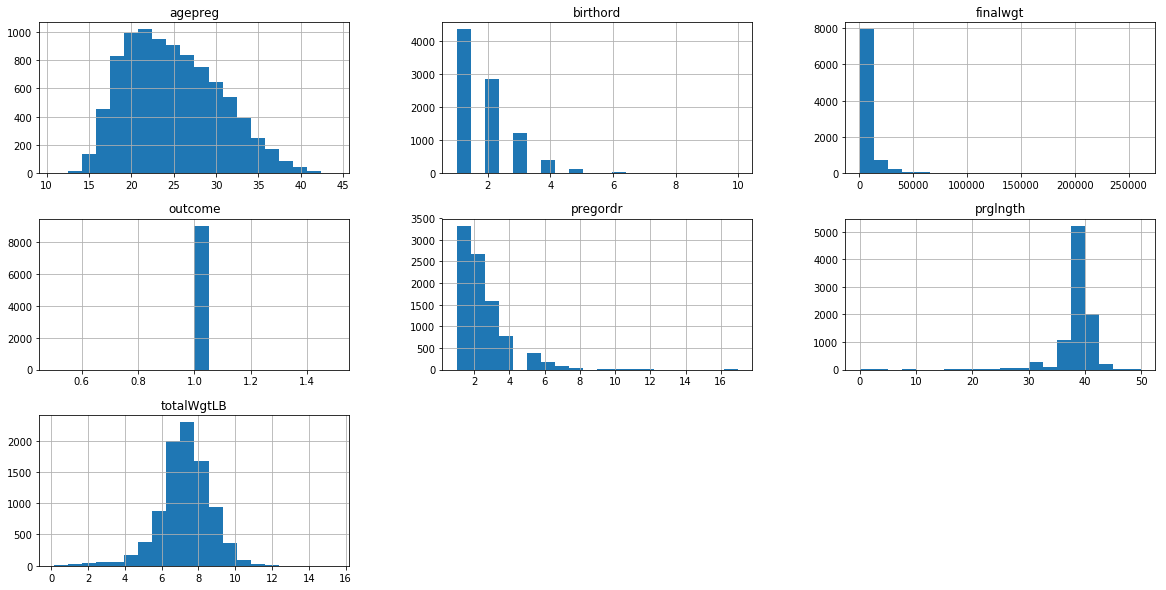

In [46]:
PrecisePregByCaseID.hist(figsize=(20,10), bins=20);

### 在匯總統計量的agepreg變數中，我們觀察到其最大與最小值分別為0與50。我們依據它的範圍，來定義bins的數量。

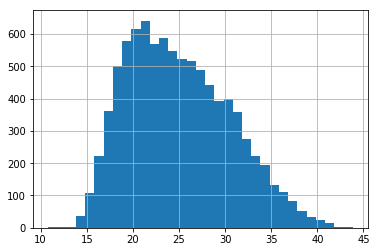

In [47]:
PrecisePregByCaseID.agepreg.hist(bins=np.arange(PrecisePregByCaseID.agepreg.min(),
                                                 PrecisePregByCaseID.agepreg.max()));

[回本章目錄](#本章目錄)

### 2.4 數據集的統計圖示
+ 數據分析的第一步是對原始數據的視覺化觀察，我們的大腦是非常擅長在數據的視覺化中識別出樣式(patterns) 。訣竅是如何選擇最豐富的數據顯示類型。Python的Matplotlib軟件包提供了的許多的圖像類型，最簡單的使用方法是[瀏覽其畫廊](http://matplotlib.org/gallery.html)，然後將相應的Python代碼複製到我們的程式中。我們也可以直接使用[Pandas Plot](https://pandas.pydata.org/pandas-docs/stable/visualization.html#)。
+ Python提供不少的繪圖包(plotting packages)，例如[seaborn](http://www.stanford.edu/~mwaskom/software/seaborn/)，它是建立在matplotlib上，界面簡潔，在繪製統計數據圖上，特別能感受到其所呈現的信息而且在視覺上能吸引使用者的目光。Pandas也是建立在matplotlib上，提供了很多方便的方法來顯示數據。
+ 其他有趣的繪圖包還有[plot.ly](https://plot.ly)，互動式的[bokeh](http://bokeh.pydata.org/)等等。我們以seaborn來重新繪製直方圖並將結果儲存起來。

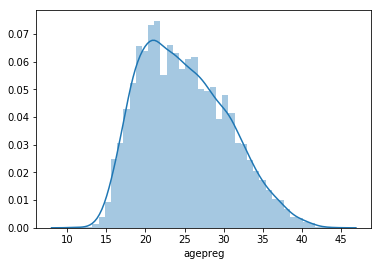

In [48]:
import seaborn as sns
sns.distplot(PrecisePregByCaseID.agepreg.dropna());
plt.savefig(IODataDir+'/agepreg_distribution.png')

[回本章目錄](#本章目錄)

### 2.4.1 單變量數據的統計圖示
常用的單變量數據的統計圖示如下：
- *散點圖(Scatter Plots)*:在橫軸及縱軸上繪製數據點，以顯示變量之間的相互影響程度，通常使用於雙變量的數據。
- *直方圖(Histogram)*:在統計學中，直方圖是一種對數據分佈情況的圖示，它的兩個坐標分別是統計樣本和該樣本對應的某個屬性的度量(次數或頻率)。
- *核心密度估計圖(Kernel-Density-Estimation(KDE) Plots)*:所謂核心密度函數的估計，就是採用平滑的峰值函數(kernal)來擬合觀察到的數據點，從而對真實的概率分佈曲線進行模擬。
- *累計頻率圖(Cumulative Frequencies/Percentage)*:在統計學中，有時因分析的需要而觀察某一數值以下或某一數值以上的頻率之和，叫做累積頻率或累積百分比。從變量值小的一方向變量值大的一方累加，稱為向上累積，反之為向下累積。頻率的最終累積值為100％。
- *誤差線(Eerror Bar)*:通常是使用在長條圖(barplot)，用來表示整組資料的離散程度，離散程度則是表示每一筆資料與平均值的集中程度，通常用標準差表示。
- *箱線圖(Box Plots)*:也稱箱鬚圖(Box-whisker Plots)，是利用數據中的五個統計量：最小值、第一四分位數、中位數、第三四分位數與最大值來描述數據的一種方法，它也可以粗略地看出數據是否具有對稱性，分佈的分散程度等信息，特別可以用於對幾個樣本的比較。
- *分組長條圖(Grouped Bar Charts)*:當擁有多個分組，可以使用群組條形圖來比較其他群組內的值。
- *圓餅圖(Pie Charts)*:是一個劃分為幾個扇形的圓形統計圖表，用於描述量、頻率或百分比之間的相對關係。在圓餅圖中，每個扇區的弧長大小為其所表示的數量的比例。

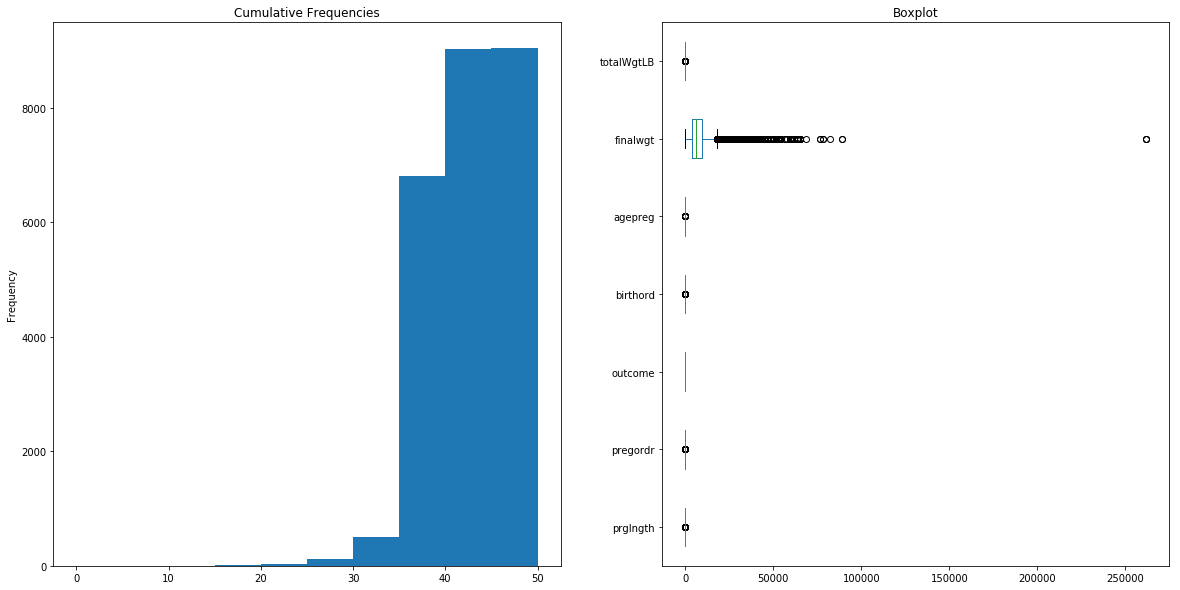

In [49]:
fig, [ax1,ax2] = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
PrecisePregByCaseID.prglngth.plot(ax=ax1, kind='hist', cumulative=True,title='Cumulative Frequencies');
PrecisePregByCaseID.plot(ax=ax2, kind='box', vert=False, title='Boxplot');

[回本章目錄](#本章目錄)

### 2.4.2 多變量數據的統計圖示
散點圖矩陣(scatter matrix)是多變量數據的統計圖示的方法。散散點圖矩陣為一般散點圖的延伸。當使用者，欲同時比較多個變數間，兩兩變數的相關性時，散點圖矩陣是個不錯的選擇。藉由散佈圖矩陣，可將多個變數間兩兩變數的ㄧ般散佈圖畫在一起方便後續比較。

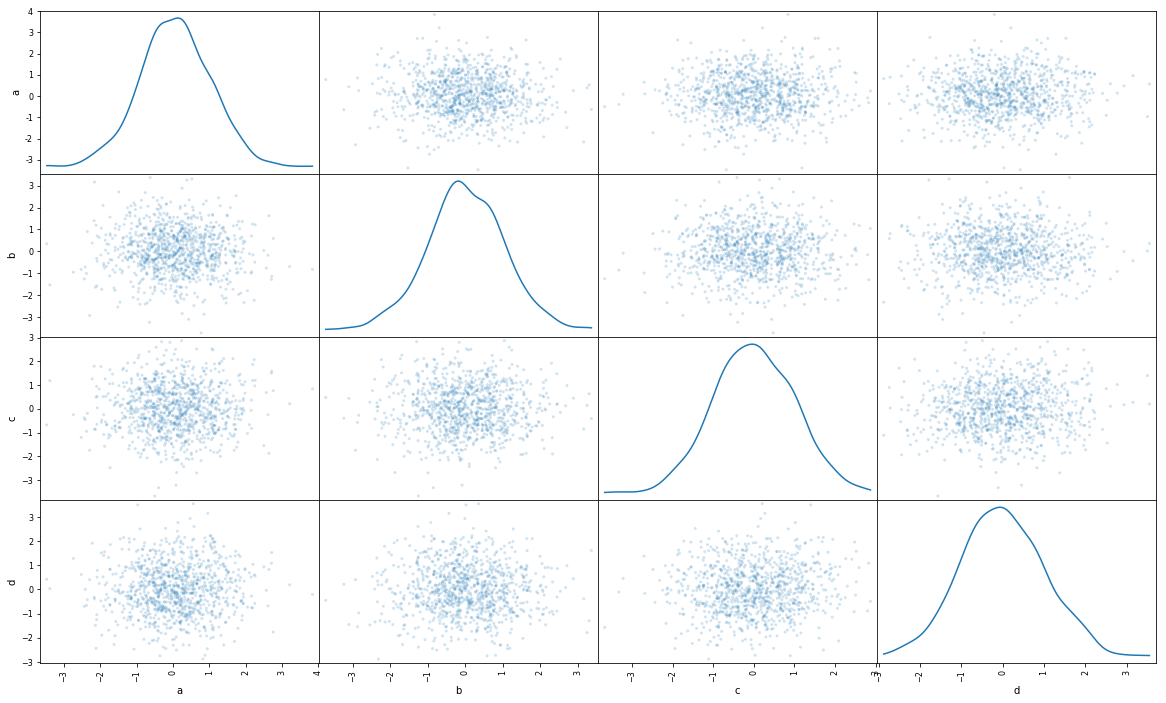

In [50]:
from pandas.plotting import scatter_matrix
aDF = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(aDF, alpha=0.2, figsize=(20, 12), diagonal='kde');

[回本章目錄](#本章目錄)

### 2.4.3 Seaborn的箱鬚圖視覺化圖示範例
+ 箱鬚圖(Boxplot)是一種用於顯示一組數據分散情況的統計圖。因型狀如箱子而得名。它能顯示出一組數據的最大值，最小值，中位數，及上下四分位數。
+ 下圖使用的數據是來自美國社區調查(American Community Survey)，[使用的資料來源在此](https://github.com/fivethirtyeight/data/tree/master/college-majors)。數據內容是對畢業學生的經濟狀況的調查，調查期間為自2010年到2012年。當然，大學學位並不能保證經濟上的成功。 但是，選擇的專業或許能提高在經濟上優勢。詳細的討論內容，可以參考這個[網址](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/)。
+ 我們先計算專業學門的各項平均，再將平均後的中位數(Median)、百分之25(p25th)及百分之75(p75th)做為每個專業學門的三個數據。然後，再依此三個數據，以箱鬚圖繪出。

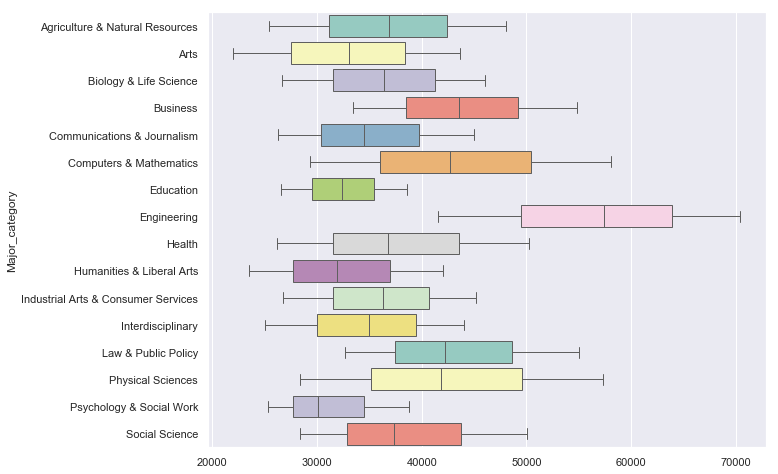

In [51]:
aDF = pd.read_csv(IODataDir+'/recent-grads.csv')
groupedDF = aDF.groupby('Major_category').mean()
quartileDF = groupedDF[['Median','P25th','P75th']].transpose()
sns.set_context('poster')
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(data=quartileDF, orient= 'h', linewidth=1, palette="Set3");

[回本章目錄](#本章目錄)

### 2.4.4 Seaborn的散點圖矩陣視覺化圖示範例

### 下圖使用的數據是著名的鳶尾花(Iris)例子:
<img src="./Data_and_Images/iris.png" height="800" width="600">
+ 鳶尾花的名稱是因其花瓣狀似鳶鳥的尾巴。我們共有三類的鳶尾花: 維吉尼亞鳶尾(virginica)、變色鳶尾(versicolor)以及山鳶尾(Setosa)。每株鳶尾花共有四個以公分為單位的量測值，分別為萼片長度(sepal length)、萼片寬度(sepal width)、花瓣長度(petal length)、花瓣寬度(petal width)。我們使用Seaborn的散點圖矩陣(Scatter Matrix)來視覺倆倆變數間的相關性，企圖以圖示的方法來辨別它們。讀者可以聚焦在第三列(column)的花瓣長度上,似乎花瓣長度這個量測變數可以輕易地分辦出山鳶尾與其他兩類的鳶尾花。

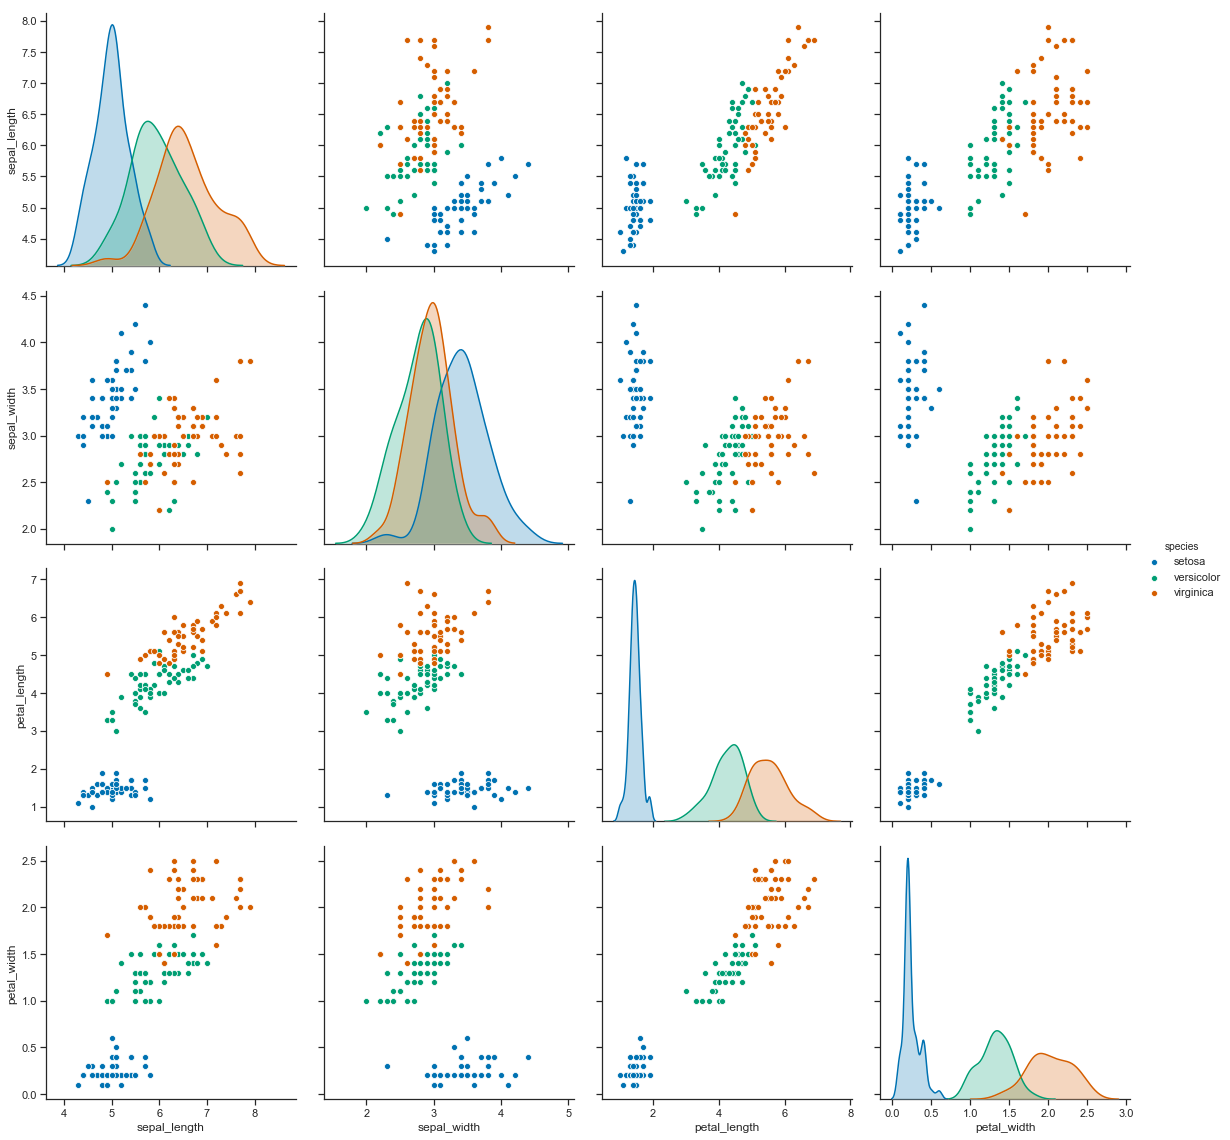

In [52]:
sns.set(style="ticks")
plt.style.use('seaborn-colorblind')
irisDF = sns.load_dataset("iris")
sns.pairplot(irisDF, hue="species", height=4);

[回本章目錄](#本章目錄)

### 2.4.5 平行座標圖(parallel coordinates)視覺化圖示範例
#### 平行座標圖(parallel coordinates)
- 多變量數據集的平行座標呈現方式，可以把多變量的交互作用顯現在二維的平面圖上。 傳統數學中不同維度互相正交的基本假設限制了顯現座標系統的方法，因而最多只能觀看三維系統。平行座標的方法把這個假設推翻，而用互相平行的軸來表示不同的維度，這樣一來，能顯現的維度除了螢幕的解析度外，幾乎就沒有什麼限制了。下圖是我們的鳶尾花例子。

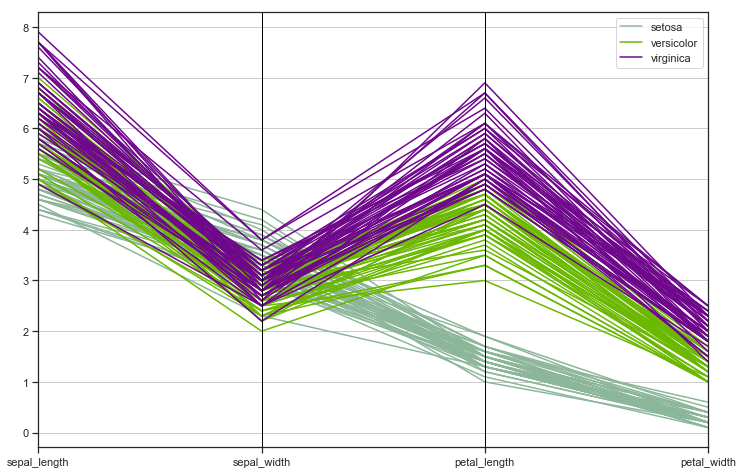

In [53]:
plt.figure(figsize=(12, 8))
pd.plotting.parallel_coordinates(irisDF, 'species');

[回本章目錄](#本章目錄)

### 2.4.6 相關性Heapmap視覺化圖示範例
#### 相關性(correlation)
- 研究相關性是為了以了解變量對和變量的相關性。這種分析有助於我們了解變量間的相依性。最好的相關性度量是皮爾遜相關係數(Pearson correlation coefficient)。它是通過將兩個變量的協方差(variance)除以它們的標準偏差(standard variation)的乘積而得到的:$\dfrac{Var(A, B)}{\sigma_{A} \sigma_{B}}$。我們可以如下計算Iris數據集的每對變量之間的相關係數：

In [54]:
corrcoef = irisDF[irisDF.columns[0:4]].corr()
print(corrcoef)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


#### 執行函數corrcoef後，將得到返回一個對稱矩陣，其中行(row)是變量，列(column)是觀察值。 矩陣的每個元素值表示兩個變量之間的相關性。當兩個變量的數值一起增加時，相關係數為正值。 若是當一個值隨著另一個值的增加而下降時，相關係數是負的。 具體而言，我們認為當相關係數為1，是完全的正相關，0是不相關，-1是完全的負相關。當變量的數量增加時，我們可以使用彩色圖來可視化所得的相關矩陣：

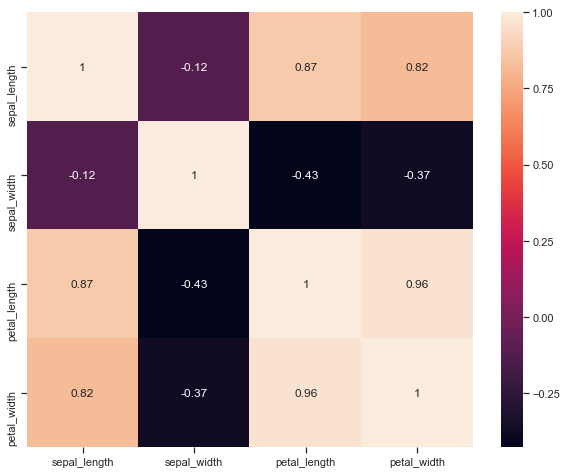

In [55]:
sns.heatmap(corrcoef, xticklabels = corrcoef.columns, yticklabels = corrcoef.columns, annot=True);

上圖右側的顏色條顯示圖上的顏色與數值的對應值。我們可以看到，我們數據集中最強的相關性在變量“花瓣寬度(petal width)”和“花瓣長度(petal length)”之間。

[回本章目錄](#本章目錄)

## 3. 探索性數據分析範例I-自行車共享數據集
- ### 自行車共享是取自於[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset). 在這範例中，我們只使用了hour.csv這個資料檔.
- ### 問題陳述(Problem Statement)
> ### 隨著環境問題和健康問題日益成為熱門話題，近年來，使用自行車作為交通工具的方式越來越受到重視。為了鼓勵自行車的使用，全世界的城市已經成功推出自行車共享計劃。根據這樣的計劃，騎車人可以使用遍布整個城市的手動/自動交易亭(kiosks)在規定的時間內租用自行車。在大多數情況下，騎車手可以從一個地方領取自行車並將它們放回到任何其他指定地點。
> ### 來自世界各地的自行車共享平台提供了各種數據來源的熱點，這些數據包含旅行時間，開始和結束的位置，騎車手的人口相關統計(如年龄、性别...)等等。這些數據伴隨諸如天氣，交通，地形等等的其他信息源，使其在研究領域中頗具吸引力。 Capital Bike Sharing數據集涵蓋華盛頓特區自行車共享計劃有關的信息。<font color='red'>鑑於這種自行車共享數據加上天氣信息的數據集，我們是否可以準確預測自行車租賃在特定條件下的需求嗎？你/妳們或有甚麼其他的想法嗎?為了能達到那樣的一個想法，我們還需要甚麼樣額外的數據集呢?</font>

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
from IPython.display import display, HTML

In [57]:
# setting params
params = {'legend.fontsize': 'x-large','figure.figsize': (30, 10),
         'axes.labelsize': 'x-large', 'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
sns.set_style('whitegrid')
%matplotlib inline

### 3.1 載入資料

### 使用pandas來載入資料是相當方便的，甚至在程式中，可以利用StringIO將資料放入data frame當中。

In [58]:
 data = '''year\tinches\tlocation
 2006\t633.5\tutah
 2007\t356\tutah
 2008\t654\tutah
 2009\t578\tutah
 2010\t430\tutah
 2011\t553\tutah
 2012\t329.5\tutah
 2013\t382.5\tutah
 2014\t357.5\tutah
 2015\t267.5\tutah'''

In [59]:
from io import StringIO
snow = pd.read_table(StringIO(data))
snow

,year,inches,location
0,2006,633.5,utah
1,2007,356.0,utah
2,2008,654.0,utah
3,2009,578.0,utah
4,2010,430.0,utah
5,2011,553.0,utah
6,2012,329.5,utah
7,2013,382.5,utah
8,2014,357.5,utah
9,2015,267.5,utah


### 載入自行車使用資料

In [60]:
bikeHourDF = pd.read_csv(IODataDir+'hour.csv')
bikeHourDF.head().T

,0,1,2,3,4
instant,1,2,3,4,5
dteday,2011-01-01,2011-01-01,2011-01-01,2011-01-01,2011-01-01
season,1,1,1,1,1
yr,0,0,0,0,0
mnth,1,1,1,1,1
hr,0,1,2,3,4
holiday,0,0,0,0,0
weekday,6,6,6,6,6
workingday,0,0,0,0,0
weathersit,1,1,1,1,1


[回本章目錄](#本章目錄)

### 3.2 數據類型和摘要統計

In [61]:
bikeHourDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### 數據集包含：
> ### 共17個屬性和17379條記錄
> ### 除了dteday之外，其餘都是數字(int或float)
> ### 如UCI數據集網站頁面所述，屬性temp，atemp，humidity和windspeed已經標準化
> ### 數據集有許多分類變量(categorical variables)，如season，yr，holiday，weathersit等。這些將需要小心處理。

In [62]:
side_by_side(bikeHourDF.head().T,  bikeHourDF.shape)

                     0           1           2           3           4    (17379, 17)
instant              1           2           3           4           5               
dteday      2011-01-01  2011-01-01  2011-01-01  2011-01-01  2011-01-01               
season               1           1           1           1           1               
yr                   0           0           0           0           0               
mnth                 1           1           1           1           1               
hr                   0           1           2           3           4               
holiday              0           0           0           0           0               
weekday              6           6           6           6           6               
workingday           0           0           0           0           0               
weathersit           1           1           1           1           1               
temp              0.24        0.22        0.22        

In [63]:
side_by_side(bikeHourDF.isnull().sum(), bikeHourDF.count(), bikeHourDF.instant.nunique())

instant       0    instant       17379    17379
dteday        0    dteday        17379         
season        0    season        17379         
yr            0    yr            17379         
mnth          0    mnth          17379         
hr            0    hr            17379         
holiday       0    holiday       17379         
weekday       0    weekday       17379         
workingday    0    workingday    17379         
weathersit    0    weathersit    17379         
temp          0    temp          17379         
atemp         0    atemp         17379         
hum           0    hum           17379         
windspeed     0    windspeed     17379         
casual        0    casual        17379         
registered    0    registered    17379         
cnt           0    cnt           17379         
dtype: int64       dtype: int64                



### 修正屬性名稱
+ ### instant: record index 
+ ### dteday: date
+ ### season: season(1: spring, 2: summer, 3: fall, 4: winter)
+ ### yr: year(0: 2011, 1:2012) 
+ ### mnth: month(1 to 12) 
+ ### hr: hour(0 to 23)
+ ### holiday: whether day is holiday or not 
+ ### weekday: day of the week 
+ ### workingday: if day is neither weekend nor holiday it is 1, otherwise it is 0. 
+ ### weathersit: (1):Clear,few clouds,partly cloudy;(2):Mist+Cloudy,Mist+Broken clouds,Mist+few clouds,Mist;(3):light Snow, light rain+thunderstorm+Scattered clouds,light rain + Scattered clouds;(4):heavy rain+ice pallets+thunderstorm+Mist,Snow+fog
+ ### weathersit：(1):晴朗,雲層少,部分多雲;(2):薄霧+多雲,薄霧+破雲,薄霧+少雲,薄霧;(3):輕雪,小雨+雷雨+散雲,小雨+散雲;(4):大雨+冰珠+雷雨+霧,雪+霧
+ ### temp: scaled (c.f. normalized) temperature in Celsius. the values are derived via (t-t_min)/ (t_max- t_min), t_min = -8, t_max = +39 (only in hourly scale). 
+ ### atemp: scaled (c.f. normalized) feeling temperature in Celsius. the values are derived via  (t-t_min)/(t_max-t_min), t_min = -16, t_max = +50 (only in hourly scale). 
+ ### hum: normalized humidity. the values are divided by 100 (max). 
+ ### windspeed: normalized wind speed. the values are divided by 67 (max). 
+ ### casual: count of casual users 
+ ### registered: count of registered users 
+ ### cnt: count of total rental bikes including both casual and registered

In [64]:
bikeHourDF.rename(columns={'instant': 'rec_id', 'dteday': 'datetime', 'holiday': 'is_holiday', 
                            'workingday': 'is_workingday', 'weathersit': 'weather_condition',
                            'hum': 'humidity', 'mnth': 'month', 'cnt':'total_count', 'hr':'hour', 
                            'yr':'year'}, inplace=True) 

### 修正類型屬性

In [65]:
# date time conversion 
bikeHourDF['datetime'] = pd.to_datetime(bikeHourDF.datetime) 
# categorical variables 
bikeHourDF['season'] = bikeHourDF.season.astype('category')
bikeHourDF['is_holiday'] = bikeHourDF.is_holiday.astype('category')
bikeHourDF['weekday'] = bikeHourDF.weekday.astype('category')
bikeHourDF['weather_condition'] = bikeHourDF.weather_condition.astype('category')
bikeHourDF['is_workingday'] = bikeHourDF.is_workingday.astype('category')
bikeHourDF['month'] = bikeHourDF.month.astype('category')
bikeHourDF['year'] = bikeHourDF.year.astype('category')
bikeHourDF['hour'] = bikeHourDF.hour.astype('category')

### 基本匯總統計數據(summary statistics)與分布圖示

In [66]:
bikeHourDF.describe()

,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [67]:
bikeHourDF.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
rec_id,17379,NaN,NaN,NaN,NaN,NaN,8690,5017.03,1,4345.5,8690,13034.5,17379
datetime,17379,731,2012-08-29 00:00:00,24,2011-01-01 00:00:00,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17379,4,3,4496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,17379,2,1,8734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,17379,12,7,1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,17379,24,17,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_holiday,17379,2,0,16879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,17379,7,6,2512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_workingday,17379,2,1,11865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather_condition,17379,4,1,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


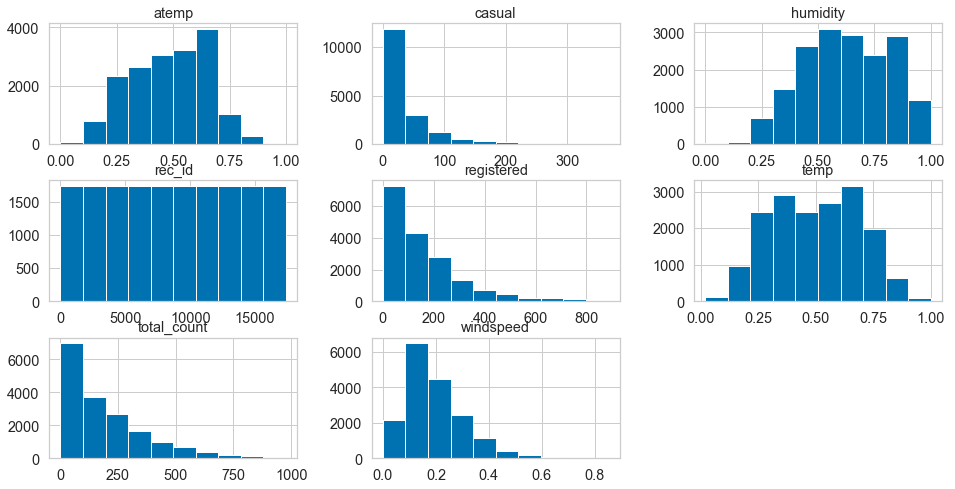

In [68]:
bikeHourDF.hist(figsize=(16,8));

### 分位數方法(quantile)默認值為顯示50％分位數，但q參數可以指定不同的級別; 在這裡，我們以10％和90％的百分位數水平為例。 我們可以看到，標準化攝氏溫度在0.74以下時，我們有90％的水平：

In [69]:
side_by_side(bikeHourDF.quantile(), bikeHourDF.quantile(q=[.1, .9]).T)

rec_id         8690.0000                        0.1         0.9
temp              0.5000     rec_id       1738.8000  15641.2000
atemp             0.4848     temp            0.2400      0.7400
humidity          0.6300     atemp           0.2424      0.6970
windspeed         0.1940     humidity        0.3700      0.8800
casual           17.0000     windspeed       0.0000      0.3582
registered      115.0000     casual          1.0000     92.0000
total_count     142.0000     registered      7.0000    354.0000
Name: 0.5, dtype: float64    total_count     9.0000    451.2000



### 計算非空單元格(null)的數量

In [70]:
side_by_side(bikeHourDF.count(), bikeHourDF.any(), bikeHourDF.any(axis=0))

rec_id               17379    rec_id               True    rec_id               True
datetime             17379    datetime             True    datetime             True
season               17379    season               True    season               True
year                 17379    year                 True    year                 True
month                17379    month                True    month                True
hour                 17379    hour                 True    hour                 True
is_holiday           17379    is_holiday           True    is_holiday           True
weekday              17379    weekday              True    weekday              True
is_workingday        17379    is_workingday        True    is_workingday        True
weather_condition    17379    weather_condition    True    weather_condition    True
temp                 17379    temp                 True    temp                 True
atemp                17379    atemp                True    atemp 

[回本章目錄](#本章目錄)

### 3.2.1 淺談資料的縮放(scaling)以及資料正規化(normalization)
+ ### 資料的縮放以及資料正規化不同之處在於，我們使用縮放來改變資料的範圍，而在正規化中，我們使用正規化來改變資料分佈的形狀。

In [71]:
# crowdfunding data
kickstarter_2017 = pd.read_csv(IODataDir+'./ks-projects-201801.csv')

In [72]:
kickstarter_2017.head().T

,0,1,2,3,4
ID,1000002330,1000003930,1000004038,1000007540,1000011046
name,The Songs of Adelaide & Abullah,Greeting From Earth: ZGAC Arts Capsule For ET,Where is Hank?,ToshiCapital Rekordz Needs Help to Complete Album,Community Film Project: The Art of Neighborhoo...
category,Poetry,Narrative Film,Narrative Film,Music,Film & Video
main_category,Publishing,Film & Video,Film & Video,Music,Film & Video
currency,GBP,USD,USD,USD,USD
deadline,2015-10-09,2017-11-01,2013-02-26,2012-04-16,2015-08-29
goal,1000,30000,45000,5000,19500
launched,2015-08-11 12:12:28,2017-09-02 04:43:57,2013-01-12 00:20:50,2012-03-17 03:24:11,2015-07-04 08:35:03
pledged,0,2421,220,1,1283
state,failed,failed,failed,failed,canceled


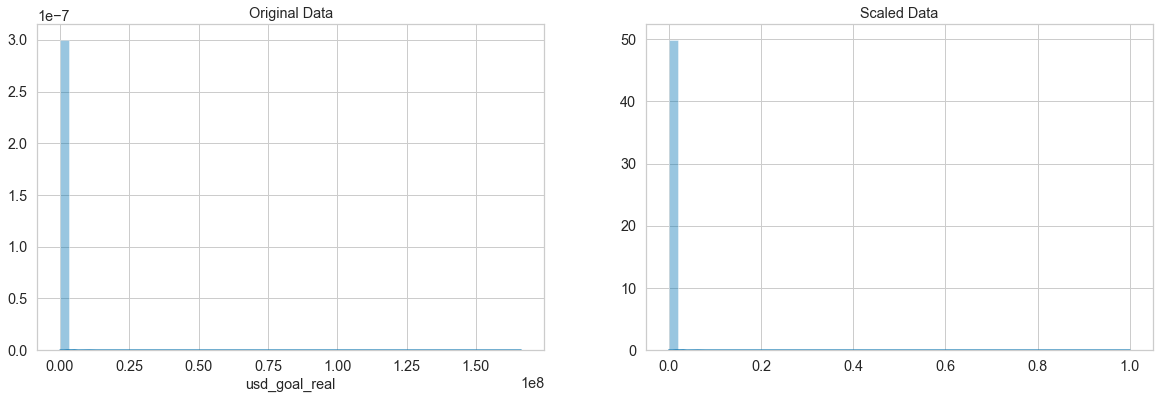

In [73]:
from sklearn import preprocessing

# scale the goals from 0 to 1
min_max = preprocessing.MinMaxScaler()
scaled_data = min_max.fit_transform(pd.DataFrame(kickstarter_2017["usd_goal_real"]))

# plot the original & scaled data together to compare
fig, ax = plt.subplots(1,2,figsize=(20,6))

sns.distplot(kickstarter_2017["usd_goal_real"], ax= ax[0])
ax[0].set_title("Original Data")


sns.distplot(scaled_data, ax= ax[1])
ax[1].set_title("Scaled Data")
plt.show();

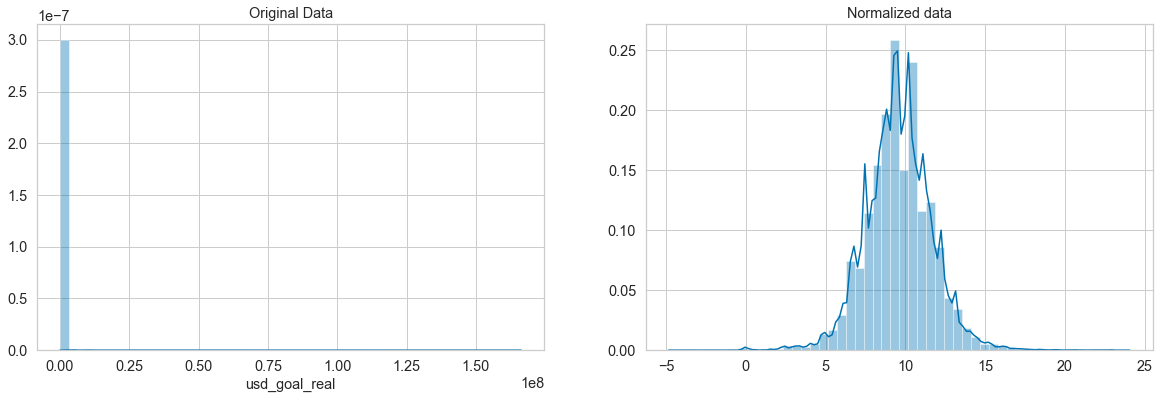

In [74]:
from scipy import stats
# normalize the usd_goal_real - Gaussian
normalized_data = stats.boxcox(kickstarter_2017["usd_goal_real"])[0]

# plot both together to compare
fig, ax = plt.subplots(1,2,figsize=(20,6))

sns.distplot(kickstarter_2017["usd_goal_real"], ax= ax[0])
ax[0].set_title("Original Data")

sns.distplot(normalized_data, ax=ax[1])
ax[1].set_title("Normalized data")
plt.show();

[回本章目錄](#本章目錄)

### 3.2.2. 資料分佈的偏度(skewness)和峰度(kurtosis)
+ ### 偏度(skewness):是統計數據分佈偏斜方向和程度的度量，也就是統計數據分佈非對稱程度的數字特徵。定義上偏度是樣本的第三階動差(moment)
+ ### 偏度定義中包括正態分佈（偏度= 0），右偏分佈（也叫正偏分佈，其偏度> 0），左偏分佈（也叫負偏分佈，其偏度<0）。
### $$ skw(X) = E\left[\left(\frac{X - \mu}{\sigma}\right)^3\right]$$
### $$ skw(X) = \frac{E\left(X^3\right) - 3 \mu E\left(X^2\right) + 2 \mu^3}{\sigma^3} = \frac{E\left(X^3\right) - 3 \mu \sigma^2 - \mu^3}{\sigma^3}$$ 
### <font color='red'>在金融市場，偏度大於0可以解釋為資料傾向于彙聚成向上的趨勢，偏度小於0可以解釋為資料傾向于彙聚成下降的趨勢。</font>
+ ### 峰度(kurtosis):是描述總體中所有取值分佈形態陡緩程度的統計量，定義上峰度是樣本的第四階動差(moment)，這個統計量需要與正態分佈相比較:
    + ### 峰度為0表示該總體數據分佈與正態分佈的陡緩程度相同;
    + ### 峰度大於0表示該總體數據分佈與正態分佈相比較為陡峭，為尖頂峰;
    + ### 峰度小於0表示該總體數據分佈與正態分佈相比較為平坦，為平頂峰
+ 峰度的絕對值數值越大表示其分佈形態的陡緩程度與正態分佈的差異程度越大。
### $$ kur(X) = E\left[\left(\frac{X - \mu}{\sigma}\right)^4\right]$$
### $$ kur(X) = \frac{E\left(X^4\right) - 4 \mu E\left(X^3\right) + 6 \mu^2 E\left(X^2\right) - 3 \mu^4}{\sigma^4} = \frac{E\left(X^4\right) - 4 \mu E\left(X^3\right) + 6 \mu^2 \sigma^2 + 3 \mu^4}{\sigma^4}$$
    ### <font color='red'>在金融市場，峰度大於0表現為無趨勢(sideway market)，峰度小於0表現為趨勢市(trending market)。</font>

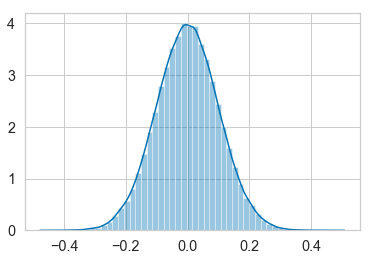

In [75]:
mu, sigma = 0, 0.1 # mean and standard deviation
normal_data = np.random.normal(mu, sigma, 100000)
fig = plt.figsize=(20,6)
sns.distplot(normal_data)
plt.show();

In [76]:
side_by_side('偏度(skewness): '+str(stats.skew(normal_data)), '峰度(kurtosis): '+str(stats.kurtosis(normal_data)))

'偏度(skewness): 0.004257489541789579'    '峰度(kurtosis): 0.028986852465676005'



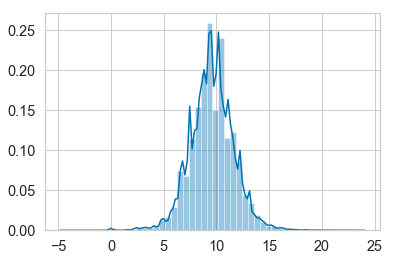

'偏度(skewness)為右偏分佈: 0.02045423041649287'    '峰度(kurtosis)陡峭，為尖頂峰: 1.6087287306792426'



In [77]:
fig = plt.figsize=(20,6)
sns.distplot(normalized_data)
plt.show();
side_by_side('偏度(skewness)為右偏分佈: '+str(stats.skew(normalized_data)), '峰度(kurtosis)陡峭，為尖頂峰: '+str(stats.kurtosis(normalized_data)))

[回本章目錄](#本章目錄)

### 3.2.3 攸關分散(dispersion)狀況的平均絕對差(Mean Absolute Deviation; MAD)量測
- ### 平均絕對差是觀測值和平均值差的絕對值的總和再除以觀測數量。平均絕對差在統計建模上常當作誤差的衡量指標。

In [78]:
data = pd.DataFrame(data = normalized_data, columns=["samples"])
side_by_side(data.mad())

samples    1.572471
dtype: float64     



[回本章目錄](#本章目錄)

### 3.3 分類變量在租用數上的趨勢/關係的視覺化

### 3.3.1 季節性的每小時租用數趨勢(Season Wise Hourly Trend of Count)
### 每小時分佈的總計數：季節編碼為1:春天，2:夏天，3:秋天，4:冬天(Hourly Distribution of Total Counts:)

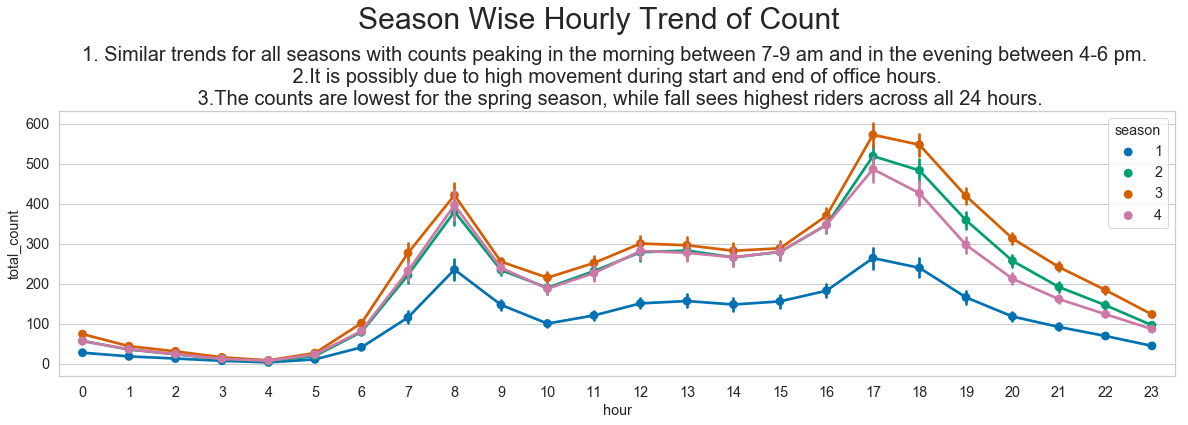

In [79]:
fig,ax = plt.subplots(figsize=(20,6))
fig.suptitle("Season Wise Hourly Trend of Count", fontsize=30)
fig.subplots_adjust(top=0.74) 
ax.set_title("1. Similar trends for all seasons with counts peaking in the morning between 7-9 am "+
       "and in the evening between 4-6 pm. \n 2.It is possibly due to high movement during " +
       "start and end of office hours. \n 3.The counts are lowest for the spring season, "+
       "while fall sees highest riders across all 24 hours.", fontsize=20)
sns.pointplot(data=bikeHourDF[['hour','total_count', 'season']],x='hour',y='total_count', hue='season',ax=ax)
plt.show();

### <center><font color='red'>練習：將季節名稱轉換為可讀字符串並重繪資料</font></center>

[回本章目錄](#本章目錄)

### 3.3.2 工作日的每小時租用數分佈(Weekday Wise Hourly Distribution of Total Counts)

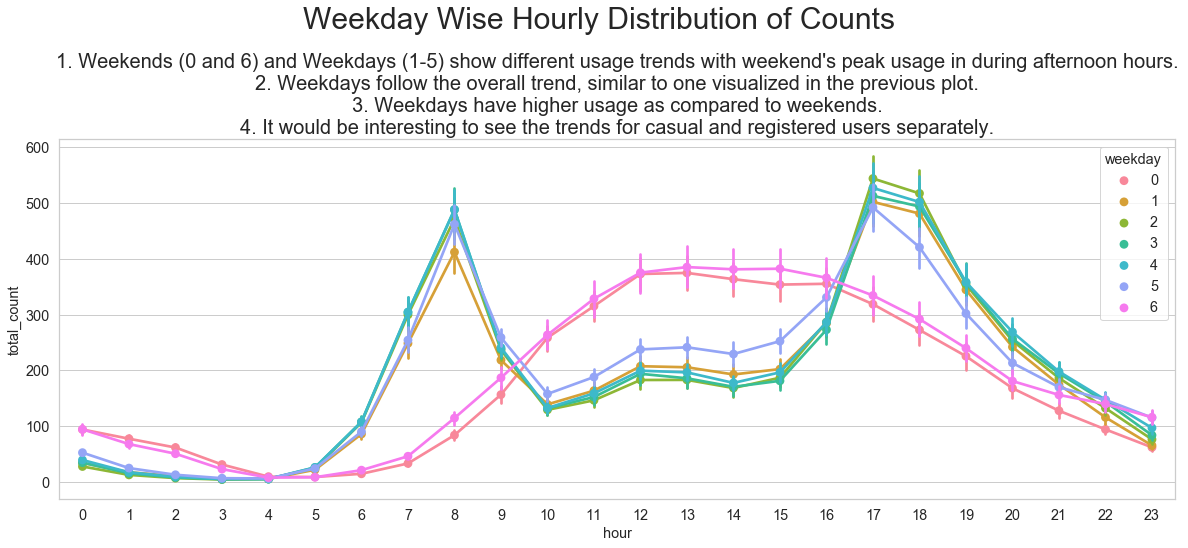

In [80]:
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle("Weekday Wise Hourly Distribution of Counts", fontsize=30)
fig.subplots_adjust(top=0.75) 
ax.set_title("1. Weekends (0 and 6) and Weekdays (1-5) show different usage trends with weekend's "+
             "peak usage in during afternoon hours.\n"+
             "2. Weekdays follow the overall trend, similar to one visualized in the previous plot.\n"+
             "3. Weekdays have higher usage as compared to weekends.\n"+
             "4. It would be interesting to see the trends for casual and registered users separately.", 
             fontsize=20)
sns.pointplot(data = bikeHourDF[['hour','total_count','weekday']], x='hour',y='total_count', hue='weekday',ax=ax)
plt.show();

[回本章目錄](#本章目錄)

### 3.3.3 每月的租用數分佈(Monthly Distribution of Total Counts)

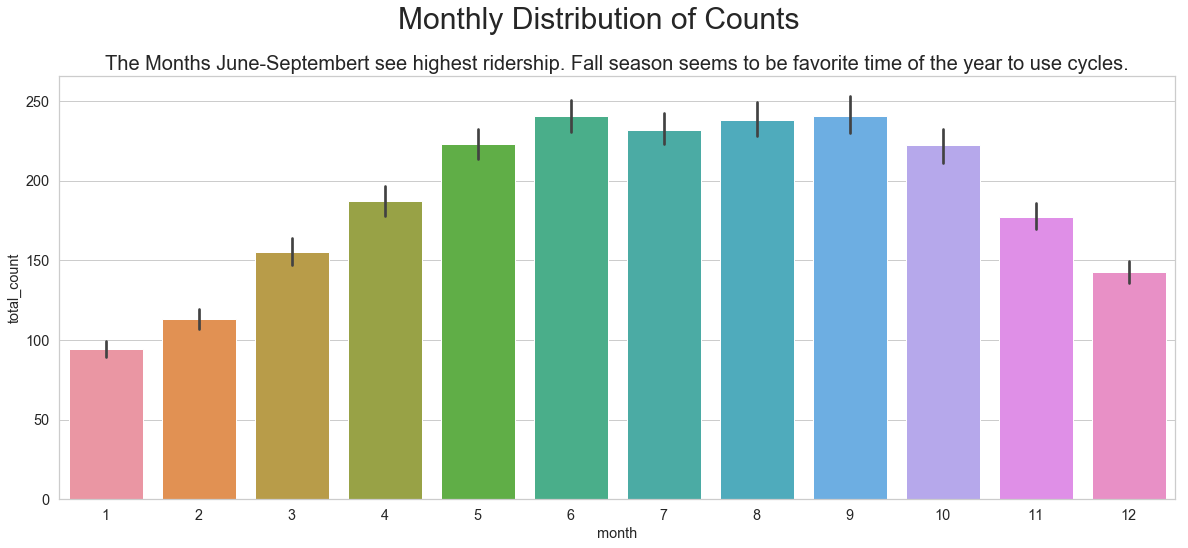

In [81]:
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle("Monthly Distribution of Counts", fontsize=30)
fig.subplots_adjust(top=0.86) 
ax.set_title("The Months June-Septembert see highest ridership. Fall season seems to be favorite time of the year to use cycles.", 
             fontsize=20)
sns.barplot(data=bikeHourDF[['month', 'total_count']], x="month",y="total_count")
plt.show()

[回本章目錄](#本章目錄)

### 3.3.4租用數的季節性分佈(Seasonal Distribution of Total Counts)

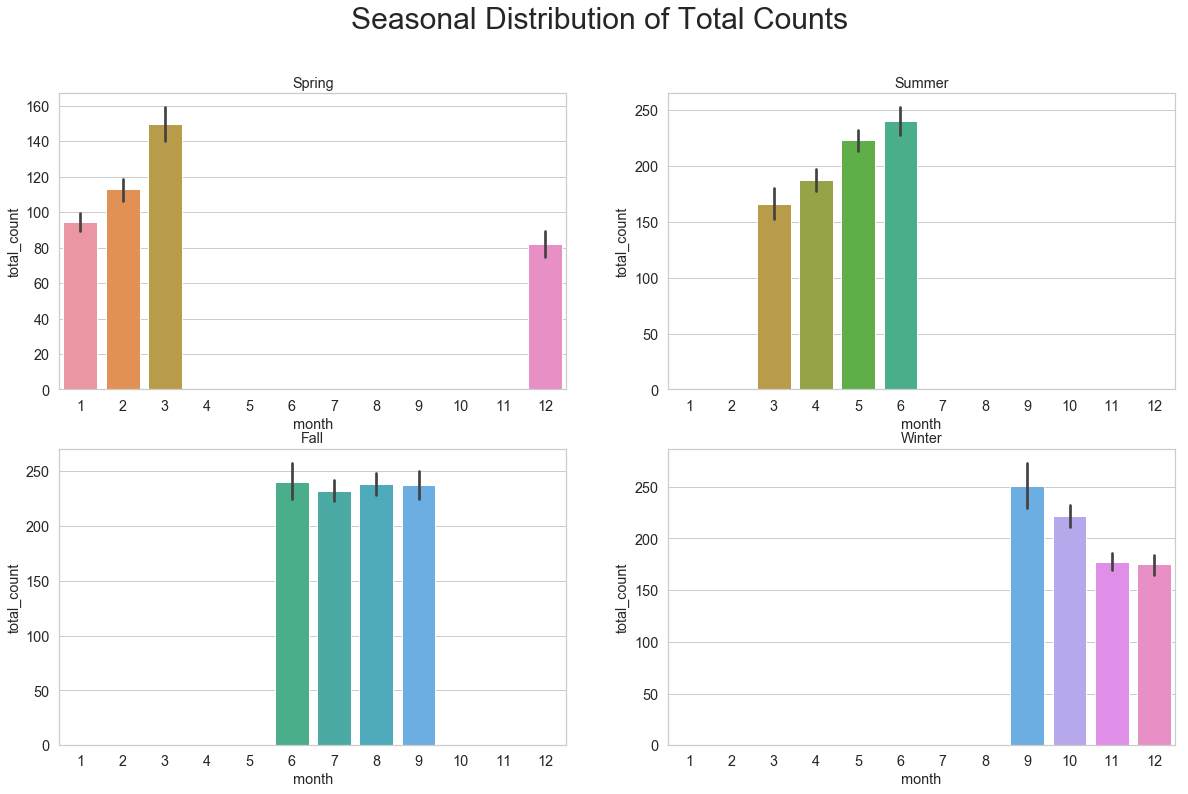

In [82]:
df_col_list = ['month','weekday','total_count']
plot_col_list= ['month','total_count']

springDF = bikeHourDF[bikeHourDF.season==1][df_col_list]
summerDF = bikeHourDF[bikeHourDF.season==2][df_col_list]
fallDF = bikeHourDF[bikeHourDF.season==3][df_col_list]
winterDF = bikeHourDF[bikeHourDF.season==4][df_col_list]

fig,ax= plt.subplots(nrows=2,ncols=2, figsize=(20,12))
fig.suptitle("Seasonal Distribution of Total Counts", fontsize=30)
sns.barplot(data=springDF[plot_col_list],x="month",y="total_count",ax=ax[0][0])
sns.barplot(data=summerDF[plot_col_list],x="month",y="total_count",ax=ax[0][1])
sns.barplot(data=fallDF[plot_col_list],x="month",y="total_count",ax=ax[1][0])
sns.barplot(data=winterDF[plot_col_list],x="month",y="total_count",ax=ax[1][1])  
ax[0][0].set(title="Spring")
ax[0][1].set(title="Summer")
ax[1][0].set(title="Fall")
ax[1][1].set(title="Winter")
plt.show();

[回本章目錄](#本章目錄)

### 3.3.5 租用數的年度分佈(Year Wise Count Distributions)

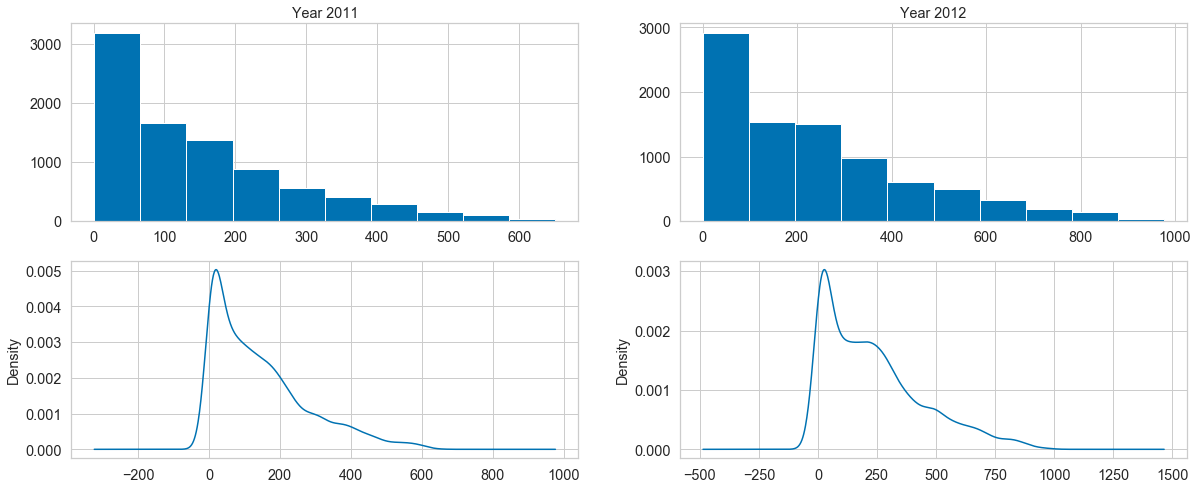

In [83]:
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(20,8))
bikeHourDF[bikeHourDF.year==0].total_count.hist(ax=ax[0,0])
bikeHourDF[bikeHourDF.year==0].total_count.plot.kde(ax=ax[1,0])
ax[0,0].set_title("Year 2011")
bikeHourDF[bikeHourDF.year==1].total_count.hist(ax=ax[0,1])
bikeHourDF[bikeHourDF.year==1].total_count.plot.kde(ax=ax[1,1])
ax[0,1].set_title("Year 2012")
plt.show();

### 小提琴圖(Violin plots)
+ ### Violin plots are similar to boxplots. Like boxplots, violin plots also visualize inter-quartile range and other summary statistics like mean/median. yet these plots are more powerful than standard boxplots due to their ability to visualize probability density of data. this is particularly helpful if data is multimodal.
+ ### 小提琴圖(Violin plots)類似於箱形圖(boxplots)。 與箱形圖一樣，小提琴圖也可以顯示四分位數範圍和其他匯總統計數據(summary statistics)，如均值/中位數。 然而，小提琴圖比箱形圖的不同在於小提琴圖能夠視覺到數據的概率密度。尤其當數據是多模式的(multimodal)，小提琴圖尤其有用。

### 標準的常態分配(Standard Normal Distribution)

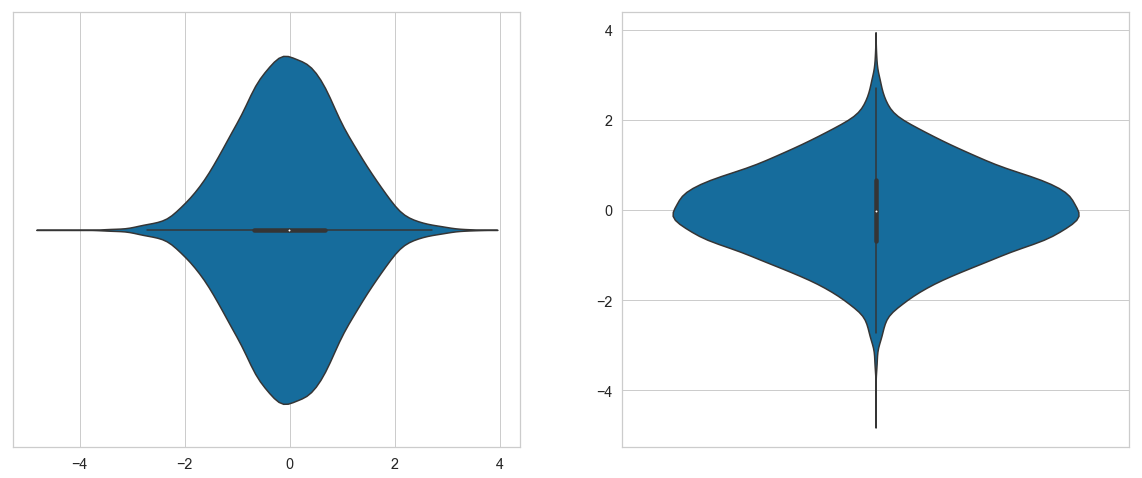

In [84]:
fig, ax = plt.subplots(ncols=2, figsize=(20,8))
samples = np.random.normal(size=10000)
sns.violinplot(samples, orient="h", ax=ax[0]);
sns.violinplot(samples, orient="v", ax=ax[1]);

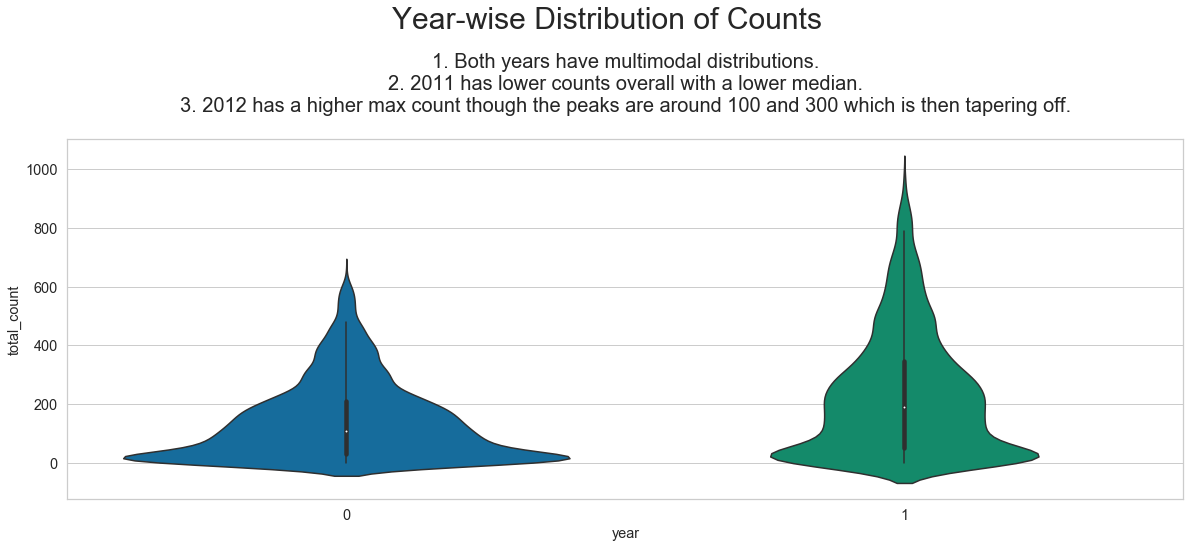

In [85]:
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle("Year-wise Distribution of Counts", fontsize=30)
fig.subplots_adjust(top=0.75) 
ax.set_title("1. Both years have multimodal distributions.\n"+
             "2. 2011 has lower counts overall with a lower median.\n"+
             "3. 2012 has a higher max count though the peaks are around 100 and 300 which is then tapering off.\n", 
             fontsize=20)
sns.violinplot(data=bikeHourDF[['year','total_count']],x="year",y="total_count")
plt.show()

[回本章目錄](#本章目錄)

### 3.3.6 工作日相對於假期的租用數分配(Working Day versus Holiday Distribution)

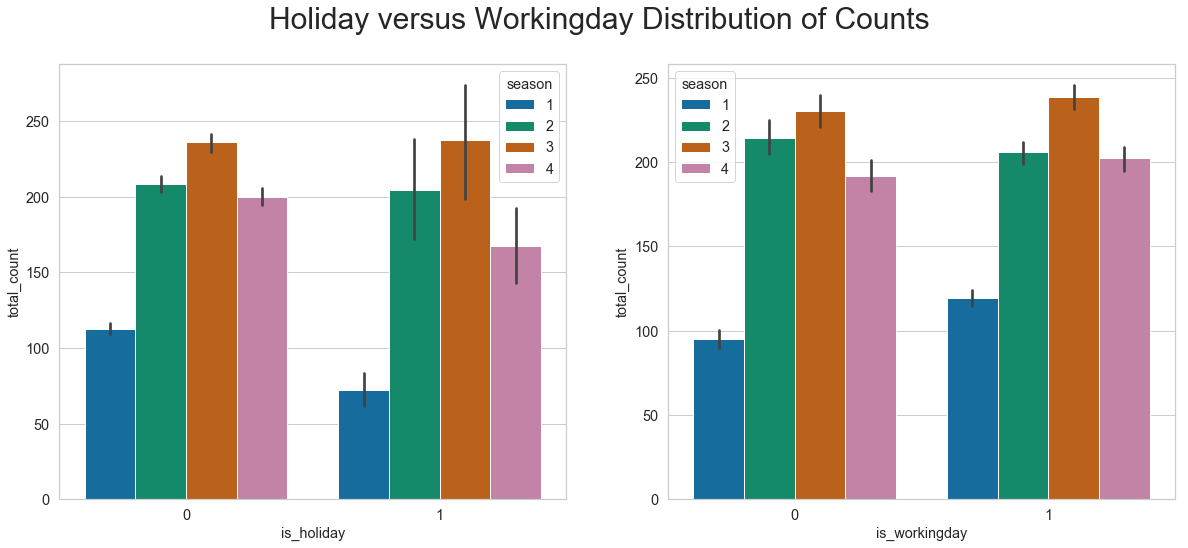

In [86]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(20,8))
fig.suptitle("Holiday versus Workingday Distribution of Counts", fontsize=30)
sns.barplot(data=bikeHourDF,x='is_holiday',y='total_count',hue='season',ax=ax1)
sns.barplot(data=bikeHourDF,x='is_workingday',y='total_count',hue='season',ax=ax2)
plt.show();

[回本章目錄](#本章目錄)

### 3.4 數值變量在租用數上的趨勢/關係的視覺化

### 3.4.1 攝氏溫度與體溫在租用數上的趨勢(Temp/aTemp vs. Counts)

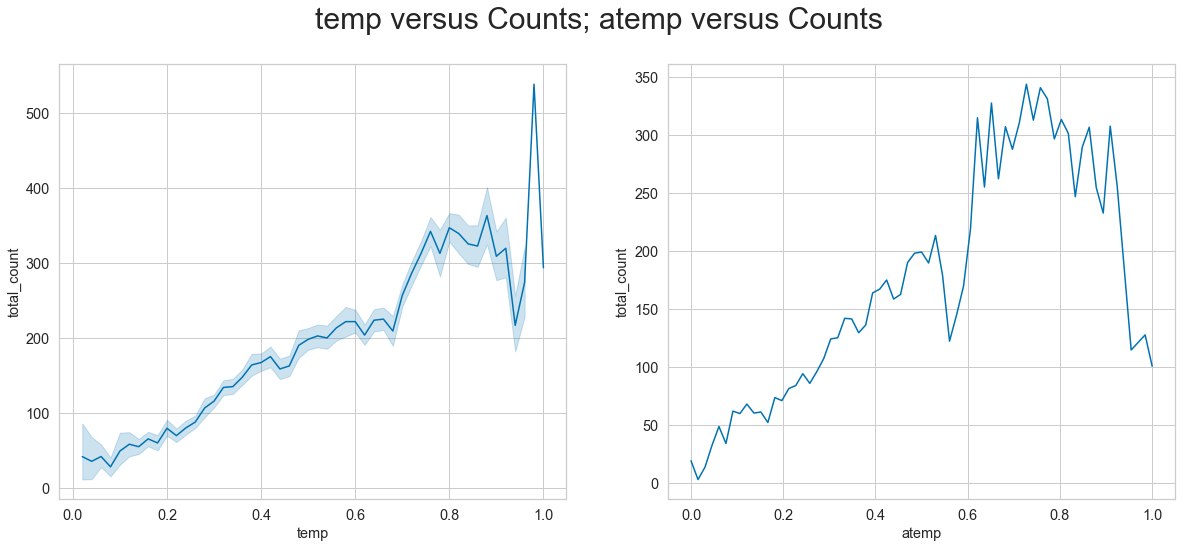

In [87]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(20,8))
fig.suptitle("temp versus Counts; atemp versus Counts", fontsize=30)
sns.lineplot(data=bikeHourDF,x='temp',y='total_count', ax=ax1)
sns.lineplot(data=bikeHourDF,x='atemp',y='total_count', ci=None, ax=ax2)
plt.show();

[回本章目錄](#本章目錄)

### 3.4.2 濕度/風速在租用數上的趨勢(Humidity/Windspeed vs. Counts)

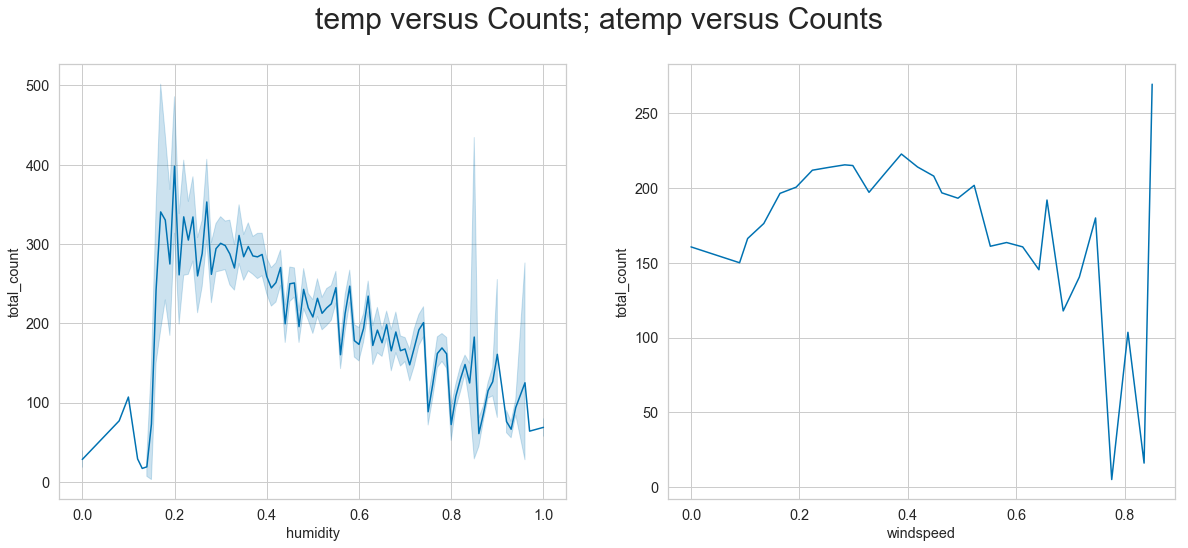

In [88]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(20,8))
fig.suptitle("temp versus Counts; atemp versus Counts", fontsize=30)
sns.lineplot(data=bikeHourDF,x='humidity',y='total_count', ax=ax1)
sns.lineplot(data=bikeHourDF,x='windspeed',y='total_count', ci=None, ax=ax2)
plt.show();

[回本章目錄](#本章目錄)

### 3.5 離群值(Outliers)的判讀

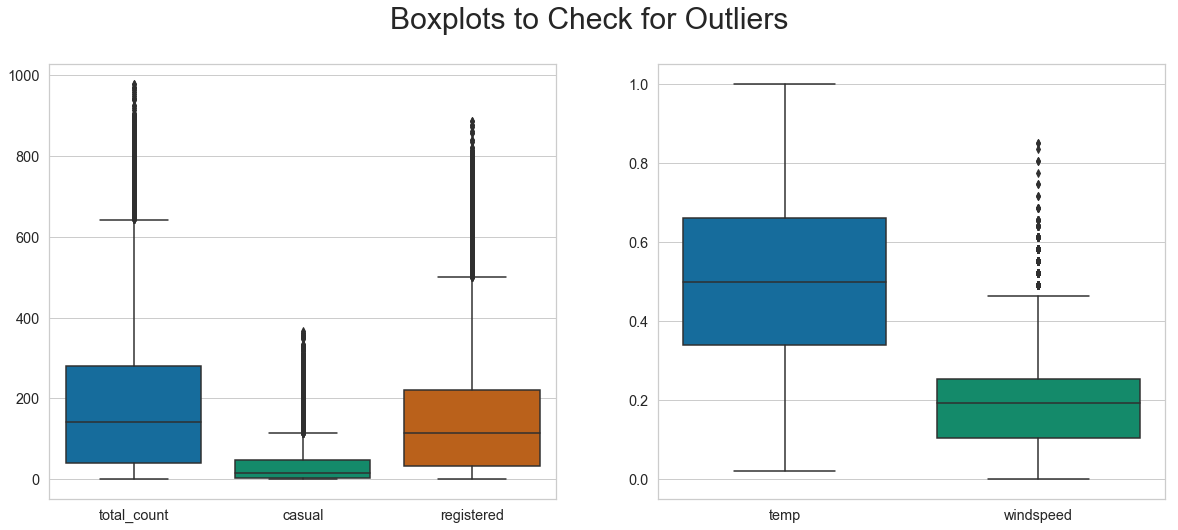

In [89]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(20,8))
fig.suptitle("Boxplots to Check for Outliers", fontsize=30)
sns.boxplot(data=bikeHourDF[['total_count', 'casual','registered']],ax=ax1)
sns.boxplot(data=bikeHourDF[['temp','windspeed']],ax=ax2)
plt.show();

### 數據中若存在異常值而且這是有問題的，那麼.clip方法將列(或axis= 1時的行)修剪並<font color='red'>替換為某些值</font>

In [90]:
data = {'col_0': [9, -3, 0, -1, 5], 'col_1': [-2, -7, 6, 8, -5]}
df = pd.DataFrame(data)
df['col_0'].clip(-4, 6)

0    6
1   -3
2    0
3   -1
4    5
Name: col_0, dtype: int64

In [91]:
side_by_side(len(bikeHourDF['total_count'].clip(100,390)), len(bikeHourDF['total_count']))
side_by_side(bikeHourDF['total_count'].clip(100,390).max(), bikeHourDF['total_count'].max())

17379    17379

390    977



[回本章目錄](#本章目錄)

### 3.6 屬性間的相關性(Correlations)
+ ### 相關性有助於我們理解數據的不同屬性之間的關係。 在預測上的應用，相關性可幫助我們理解和利用關係以構建更好的模型

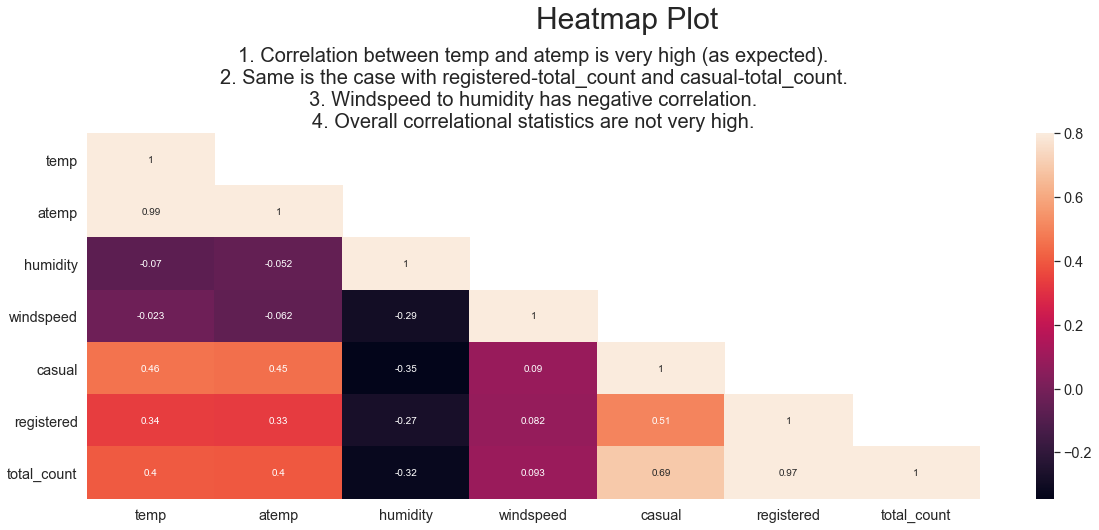

In [92]:
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle("Heatmap Plot", fontsize=30)
fig.subplots_adjust(top=0.76) 
ax.set_title("1. Correlation between temp and atemp is very high (as expected).\n"+
             "2. Same is the case with registered-total_count and casual-total_count.\n"+
             "3. Windspeed to humidity has negative correlation.\n"+
             "4. Overall correlational statistics are not very high.", fontsize=20)
corrcoef = bikeHourDF[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask = np.array(corrcoef)
mask[np.tril_indices_from(mask)] = False
# sns.heatmap(corrcoef, mask=mask, vmax=.8, square=True, annot=True, ax=ax)
sns.heatmap(corrcoef, mask=mask, vmax=.8, annot=True, ax=ax)
plt.show();

### 我們將在建構預測模組章節中，再次使用到自行車共享數據集，讓我們將bikeHourDF壓說並儲存起來。

In [93]:
bikeHourDF.to_csv('./'+IODataDir+'/bikeHourDF.csv.zip', index=False, encoding = 'utf-8', compression="gzip")

[回本章目錄](#本章目錄)

## 4. 探索性數據分析範例II-IMDB用戶的電影評分數據集
### 我們以IMDB用戶對自1950年以來到2012年的[電影評分](http://www.imdb.com/search/title?sort=num_votes,desc&title_type=feature&year=1950,2012)，我們使用最高的10,000部電影的列表。

### 其他與電影有關數據庫[GroupLens Research](https://grouplens.org/datasets/movielens/)

### 由於該文本是製表符分隔的(tab-separated)，而且並沒有任何標題。我們在pd.read_csv中設置適當的標題來處理這個問題。

In [94]:
columnNames = ['imdbID', 'Title', 'Year', 'Score', 'Votes', 'Runtime', 'Genres']
imdbDF = pd.read_csv(IODataDir+'/imdbTop10000.txt', delimiter='\t', names=columnNames).dropna()
print(imdbDF.shape)
imdbDF.head()

(9999, 7)


,imdbID,Title,Year,Score,Votes,Runtime,Genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller


> 在imdbDF的數據內容中，我們觀察到幾個問題：(1)片長時間(Runtime)應該是一個數字，但是存儲為一個字符串; (2)影片的體裁(Genres)並非單ㄧ，它聚合了多個體裁而且以'|'符號隔開; (3)電影年份在標題和年份欄中重複出現。我們必須修正他們。

In [95]:
cleanRuntime = [float(r.split(' ')[0]) for r in imdbDF.Runtime]
imdbDF['Runtime'] = cleanRuntime
imdbDF.head()

,imdbID,Title,Year,Score,Votes,Runtime,Genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142.0,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154.0,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139.0,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136.0,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148.0,Action|Adventure|Sci-Fi|Thriller


In [96]:
# 找出所有的體裁
genresSet = set()
for m in imdbDF.Genres:
    genresSet.update(g for g in m.split('|'))
genresSet = sorted(genresSet)

# 為每個體裁建立一個欄位
for genre in genresSet:
    imdbDF[genre] = [genre in movie.split('|') for movie in imdbDF.Genres]       
imdbDF.head()

,imdbID,Title,Year,Score,Votes,Runtime,Genres,Action,Adult,Adventure,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142.0,Crime|Drama,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154.0,Crime|Thriller,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club (1999),1999,8.8,458173,139.0,Drama|Mystery|Thriller,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix (1999),1999,8.7,448114,136.0,Action|Adventure|Sci-Fi,True,False,True,...,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception (2010),2010,8.9,385149,148.0,Action|Adventure|Sci-Fi|Thriller,True,False,True,...,False,False,False,False,False,True,False,True,False,False


In [97]:
# 拿掉Title的後7個字符
imdbDF['Title'] = [t[0:-7] for t in imdbDF.Title]
imdbDF.head()

,imdbID,Title,Year,Score,Votes,Runtime,Genres,Action,Adult,Adventure,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142.0,Crime|Drama,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction,1994,9.0,490065,154.0,Crime|Thriller,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club,1999,8.8,458173,139.0,Drama|Mystery|Thriller,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix,1999,8.7,448114,136.0,Action|Adventure|Sci-Fi,True,False,True,...,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception,2010,8.9,385149,148.0,Action|Adventure|Sci-Fi|Thriller,True,False,True,...,False,False,False,False,False,True,False,True,False,False


> 匯總統計量

In [98]:
imdbDF[['Score', 'Runtime', 'Year', 'Votes']].describe()

,Score,Runtime,Year,Votes
count,9999.000000,9999.000000,9999.000000,9999.000000
mean,6.385989,103.580358,1993.471447,16605.462946
std,1.189965,26.629310,14.830049,34564.883945
min,1.500000,0.000000,1950.000000,1356.000000
25%,5.700000,93.000000,1986.000000,2334.500000
50%,6.600000,102.000000,1998.000000,4981.000000
75%,7.200000,115.000000,2005.000000,15278.500000
max,9.200000,450.000000,2011.000000,619479.000000


> 片長時間有零的數值，這是有問題的。我們檢查後，共有282筆數據有這樣的情況。我們將零的數值替換成NaN。

In [99]:
print(len(imdbDF[imdbDF.Runtime == 0]))
imdbDF[imdbDF.Runtime == 0] = np.nan

282


In [100]:
imdbDF[['Score', 'Runtime', 'Year', 'Votes']].describe()

,Score,Runtime,Year,Votes
count,9717.000000,9717.000000,9717.000000,9717.000000
mean,6.384625,106.586395,1993.366059,16902.353401
std,1.181121,20.230330,14.819460,34874.254865
min,1.500000,45.000000,1950.000000,1356.000000
25%,5.700000,93.000000,1986.000000,2367.000000
50%,6.600000,103.000000,1998.000000,5158.000000
75%,7.200000,115.000000,2005.000000,15770.000000
max,9.200000,450.000000,2011.000000,619479.000000


> 展現長條圖示

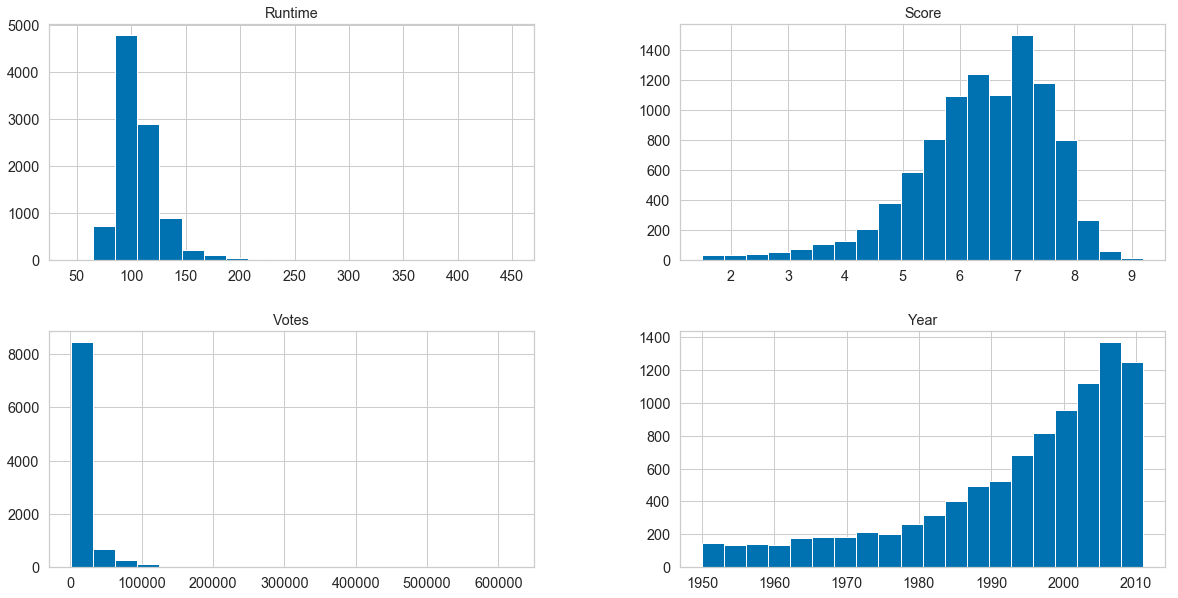

In [101]:
imdbDF[['Score', 'Runtime', 'Year', 'Votes']].hist(figsize=(20,10), bins=20);

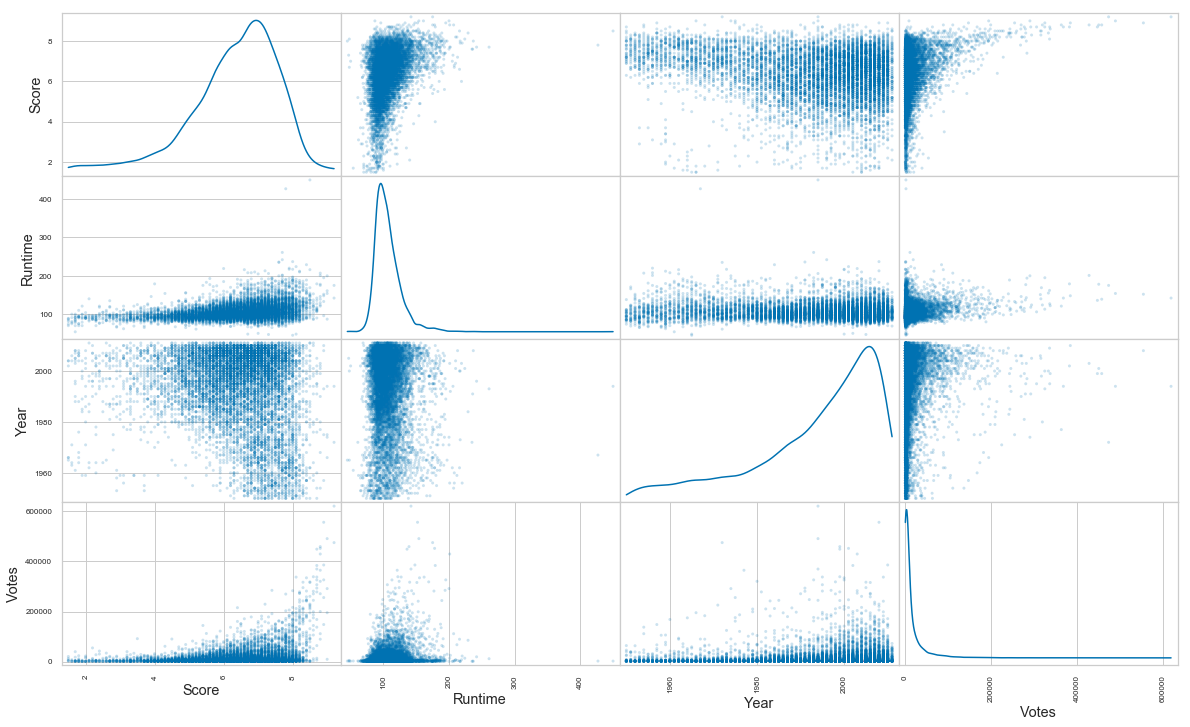

In [102]:
scatter_matrix(imdbDF[['Score', 'Runtime', 'Year', 'Votes']], alpha=0.2, figsize=(20, 12), diagonal='kde');

> 檢查是否有異常值(outliers)

In [103]:
# 有很多投票但卻是低分的電影
imdbDF[(imdbDF.Votes > 9e4) & (imdbDF.Score < 5)][['Title', 'Year', 'Score', 'Votes', 'Genres']]

,Title,Year,Score,Votes,Genres
317,New Moon,2009.0,4.5,90457.0,Adventure|Drama|Fantasy|Romance
334,Batman & Robin,1997.0,3.5,91875.0,Action|Crime|Fantasy|Sci-Fi


In [104]:
# 最低評分的電影
imdbDF[imdbDF.Score == imdbDF.Score.min()][['Title', 'Year', 'Score', 'Votes', 'Genres']]

,Title,Year,Score,Votes,Genres
1982,Manos: The Hands of Fate,1966.0,1.5,20927.0,Horror
2793,Superbabies: Baby Geniuses 2,2004.0,1.5,13196.0,Comedy|Family
3746,Daniel the Wizard,2004.0,1.5,8271.0,Comedy|Crime|Family|Fantasy|Horror
5158,Ben & Arthur,2002.0,1.5,4675.0,Drama|Romance
5993,Night Train to Mundo Fine,1966.0,1.5,3542.0,Action|Adventure|Crime|War
6257,Monster a-Go Go,1965.0,1.5,3255.0,Sci-Fi|Horror


In [105]:
# 最高評分的電影
imdbDF[imdbDF.Score == imdbDF.Score.max()][['Title', 'Year', 'Score', 'Votes', 'Genres']]

,Title,Year,Score,Votes,Genres
0,The Shawshank Redemption,1994.0,9.2,619479.0,Crime|Drama
26,The Godfather,1972.0,9.2,474189.0,Crime|Drama


In [106]:
# 各個體裁的總和
genreCount = imdbDF[genresSet].sum()
pd.DataFrame({'Genre Count': genreCount}).sort_values(by=['Genre Count'], ascending=False)

,Genre Count
Drama,5527.0
Comedy,3807.0
Thriller,2758.0
Romance,2369.0
Action,1832.0
Crime,1813.0
Adventure,1281.0
Horror,1173.0
Mystery,987.0
Fantasy,902.0


In [107]:
# 平均每部電影有多少不同之體裁
genreCount = imdbDF[genresSet].sum(axis=1) 
print("Average movie has %0.2f genres" % genreCount.mean())
genreCount.describe()

Average movie has 2.68 genres


count    9999.000000
mean        2.678668
std         1.238209
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
dtype: float64

In [108]:
# 讓我們以每十年(decade)來區隔電影
decade =  (imdbDF.Year // 10) * 10
tyd = imdbDF[['Title', 'Year']].copy()
tyd['decade'] = decade
tyd.tail()

,Title,Year,decade
9995,Meduzot,2007.0,2000.0
9996,Daltry Calhoun,2005.0,2000.0
9997,The Quiller Memorandum,1966.0,1960.0
9998,Taal,1999.0,1990.0
9999,The Navigators,2001.0,2000.0


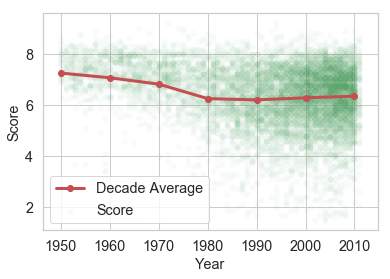

In [109]:
# 使用GroupBy把電影收集到相同decade值中，也就是分組意思
decadeMean = imdbDF.groupby(decade).Score.mean()
decadeMean.name = 'Decade Mean'# Pandas一維序列的名稱
plt.plot(decadeMean.index, decadeMean.values, 'o-', color='r', lw=3, label='Decade Average')
plt.scatter(imdbDF.Year, imdbDF.Score, alpha=.04, lw=0, color='g')
plt.xlabel("Year")
plt.ylabel("Score")
plt.legend(frameon=True)
plt.show()

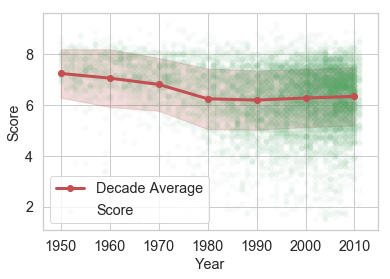

In [110]:
groupedScores = imdbDF.groupby(decade).Score
mean = groupedScores.mean()
std = groupedScores.std()

plt.plot(decadeMean.index, decadeMean.values, 'o-',
        color='r', lw=3, label='Decade Average')
plt.fill_between(decadeMean.index, (decadeMean + std).values,
                 (decadeMean - std).values, color='r', alpha=.2)
plt.scatter(imdbDF.Year, imdbDF.Score, alpha=.04, lw=0, color='g')
plt.xlabel("Year")
plt.ylabel("Score")
plt.legend(frameon=True)
plt.show();

#### 找到每年最受歡迎的電影

In [111]:
for year, subset in imdbDF.groupby('Year'):
    print(year, subset[subset.Score == subset.Score.max()].Title.values)

1950.0 ['Sunset Blvd.']
1951.0 ['Strangers on a Train']
1952.0 ["Singin' in the Rain"]
1953.0 ['The Wages of Fear' 'Tokyo Story']
1954.0 ['Seven Samurai']
1955.0 ['Diabolique']
1956.0 ['The Killing']
1957.0 ['12 Angry Men']
1958.0 ['Vertigo']
1959.0 ['North by Northwest']
1960.0 ['Psycho']
1961.0 ['Yojimbo']
1962.0 ['To Kill a Mockingbird' 'Lawrence of Arabia']
1963.0 ['The Great Escape' 'High and Low']
1964.0 ['Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb']
1965.0 ['For a Few Dollars More']
1966.0 ['The Good, the Bad and the Ugly']
1967.0 ['Cool Hand Luke']
1968.0 ['Once Upon a Time in the West']
1969.0 ['Butch Cassidy and the Sundance Kid']
1970.0 ['Patton' 'The Conformist' 'Le Cercle Rouge']
1971.0 ['A Clockwork Orange']
1972.0 ['The Godfather']
1973.0 ['The Sting' 'Scenes from a Marriage']
1974.0 ['The Godfather: Part II']
1975.0 ['Outrageous Class']
1976.0 ['Tosun Pasa']
1977.0 ['Star Wars: Episode IV - A New Hope']
1978.0 ['The Girl with the Red Scarf']
19

[回本章目錄](#本章目錄)